In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import textwrap
warnings.filterwarnings('ignore')

In [3]:
df_vaccine = pd.read_csv('D:\PycharmProjects\Python\Covid-19\data\country_vaccinations.csv')
df_vaccine['date'] = pd.to_datetime(df_vaccine['date'])
countries = list(df_vaccine['country'].unique())
vaccines_name = list(df_vaccine['vaccines'].unique())

In [4]:
data_lastest = pd.DataFrame()
for country in countries:
    temp = df_vaccine[df_vaccine['country']==country].reset_index(drop=True)
    temp = temp.iloc[-1, :]
    data_lastest = data_lastest.append(temp, ignore_index=True)

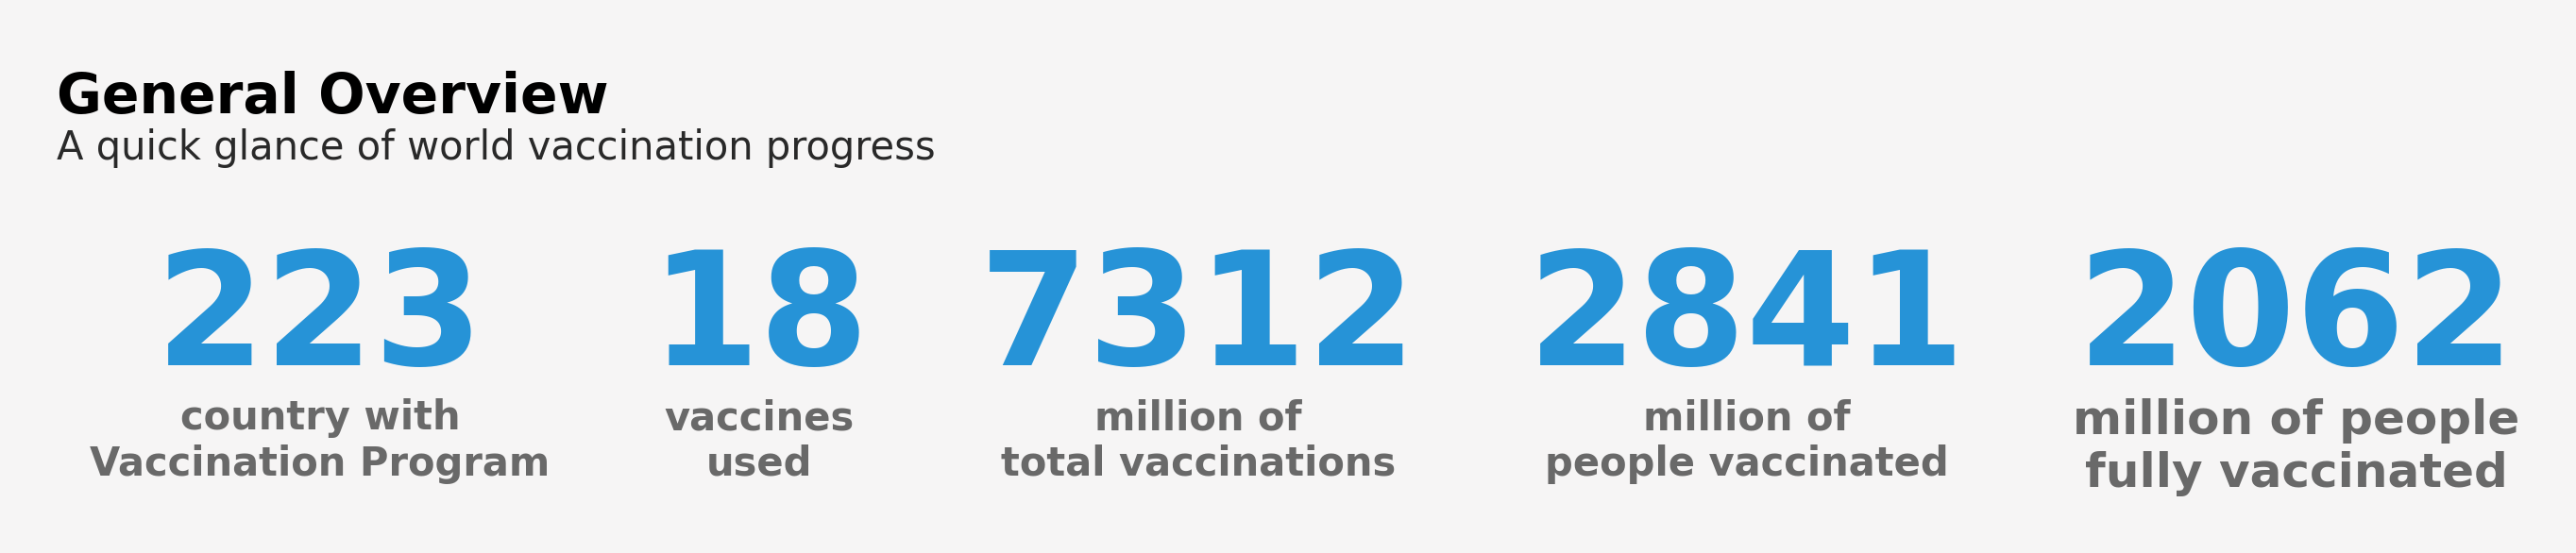

In [5]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 0.8), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
background_color = "#f6f5f5"
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["top","right", 'left', 'bottom']:
    ax0.spines[s].set_visible(False)
ax0.set_xticks([])
ax0.set_yticks([])
total_vaccine = round(data_lastest['total_vaccinations'].sum()/1000000)
people_vaccined = round(data_lastest['people_vaccinated'].sum()/1000000)
number_vaccines = len(set(data_lastest['vaccines'].to_list()))
lst_vaccines = set([y.strip() for i in data_lastest['vaccines'].to_list() for y in i.split(',')])
people_fully_vaccined = round(data_lastest['people_fully_vaccinated'].sum()/1000000)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0.text(-0.12, 0.8, 'General Overview', color='black', fontsize=7, ha='left', weight='bold', va='bottom')
ax0.text(-0.12, 0.79, 'A quick glance of world vaccination progress', color='#292929', fontsize=5, ha='left', va='top')
ax0.text(0, 0, len(countries), color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0, 0, 'country with\nVaccination Program', color='dimgray', fontsize=5, ha='center', va='top', weight='bold')
ax0.text(0.2, 0, len(lst_vaccines), color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.2, 0, 'vaccines\nused', color='dimgray', fontsize=5, ha='center', va='top', weight='bold')
ax0.text(0.4, 0, total_vaccine, color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.4, 0, 'million of\ntotal vaccinations', color='dimgray', fontsize=5, ha='center', va='top', weight='bold')
ax0.text(0.65, 0, people_vaccined, color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.65, 0, 'million of\npeople vaccinated', color='dimgray', fontsize=5, ha='center', va='top', weight='bold')
ax0.text(0.9, 0, people_fully_vaccined, color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.9, 0, 'million of people\nfully vaccinated', color='dimgray', fontsize=6, ha='center', va='top', weight='bold')
plt.show()

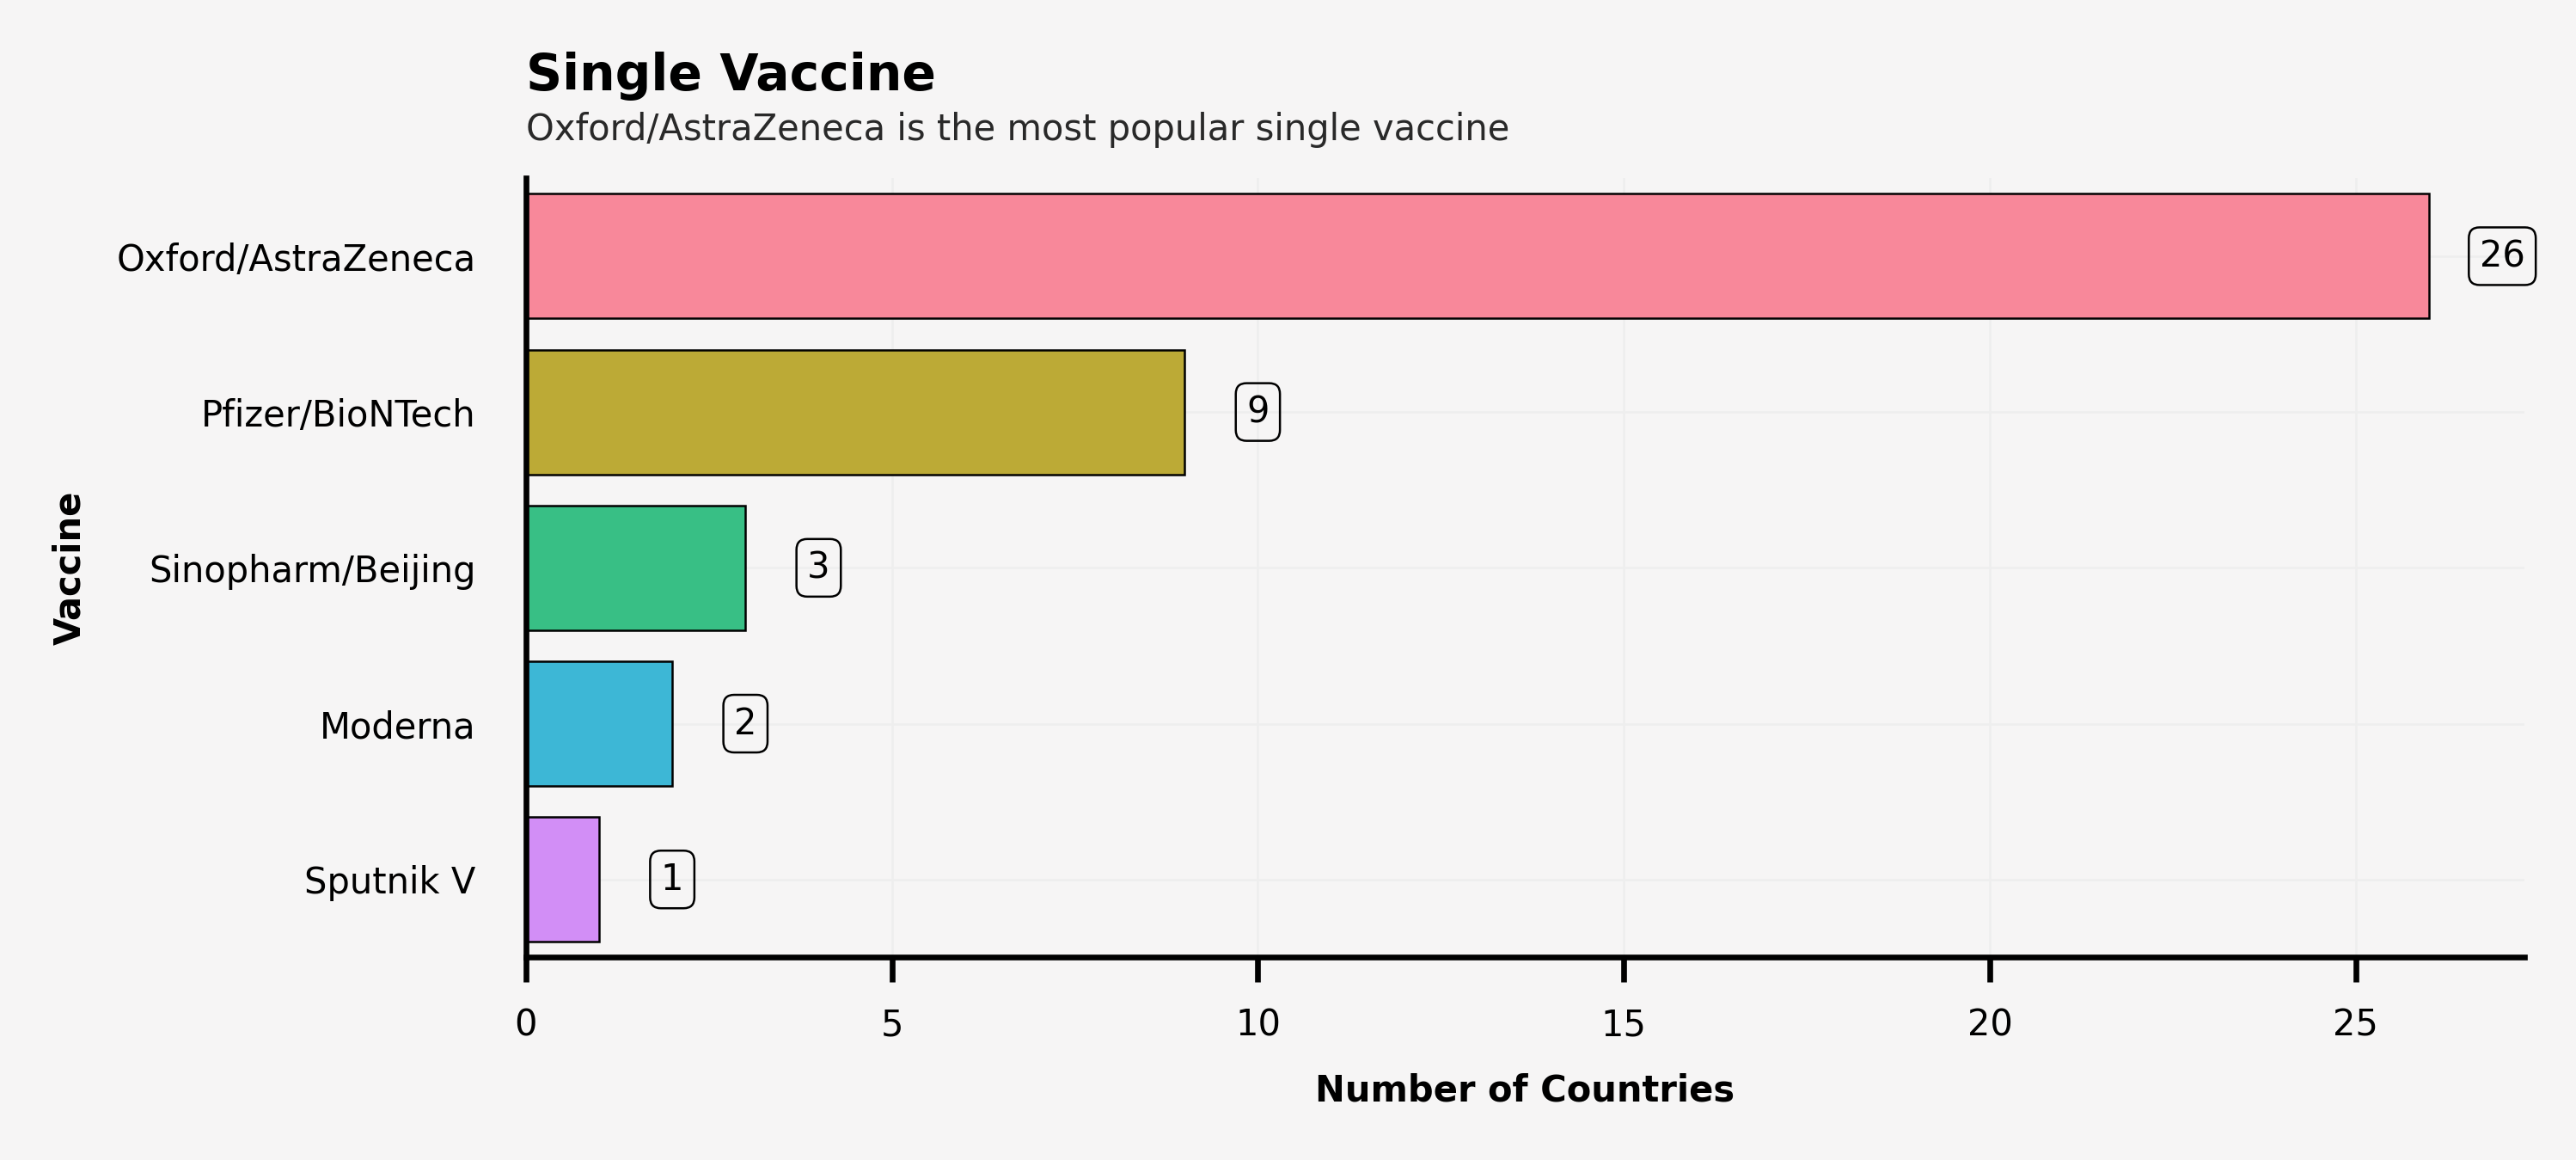

In [6]:
single_vaccine = data_lastest['vaccines'].value_counts()
single_vaccine = single_vaccine[['Oxford/AstraZeneca', 
                                 'Pfizer/BioNTech', 
                                 'Sputnik V', 
                                 'Sinopharm/Beijing',
                                 'Moderna']].sort_values(ascending=False)

background_color = "#f6f5f5"
color_map = ["lightgray" for _ in range(2)]
color_map[0] = "#2693d7"
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = "y", which = "both", left = False)
ax0.text(0, -1, 'Single Vaccine', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(0, -0.93, 'Oxford/AstraZeneca is the most popular single vaccine', color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, y=single_vaccine.index, x=single_vaccine, zorder=2, orient='h', 
                      linewidth=0.3, edgecolor='black', saturation=1)
ax0_sns.set_xlabel("Number of Countries",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccine",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

for p in ax0.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 1
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=5, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()

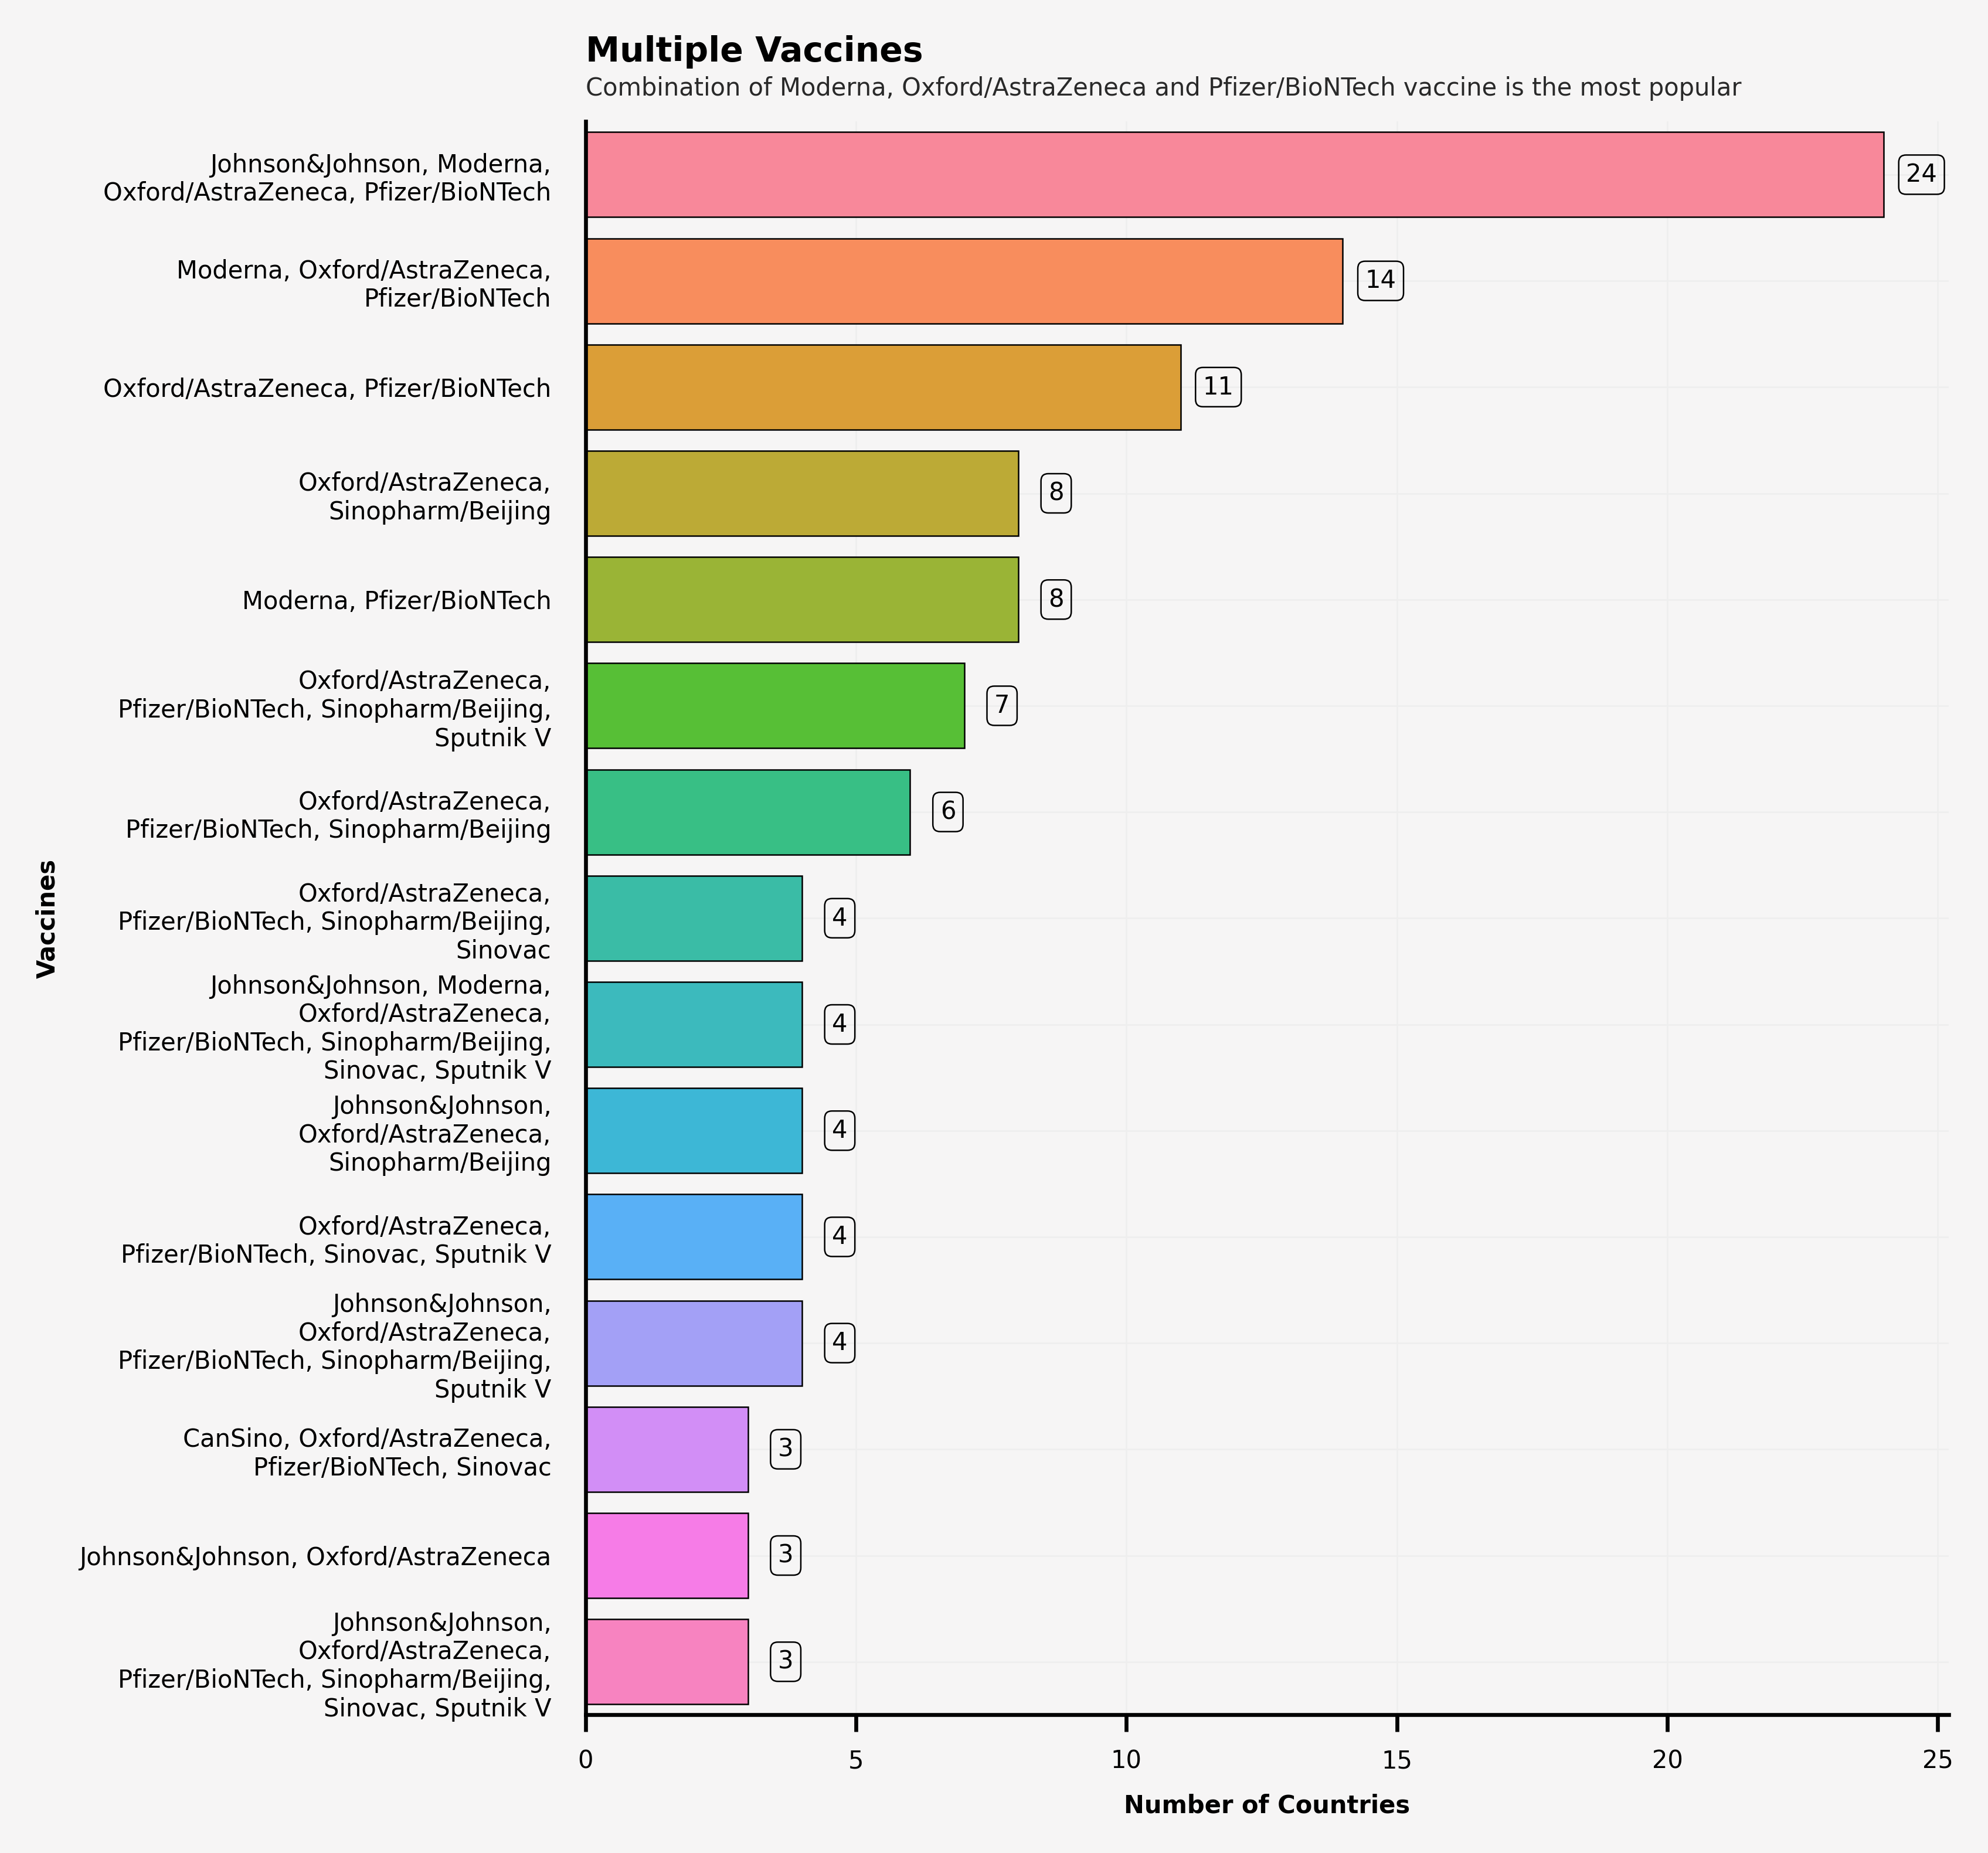

In [7]:
comb_vaccine = data_lastest['vaccines'].value_counts()
comb_vaccine = comb_vaccine.drop(['Oxford/AstraZeneca', 
                                 'Pfizer/BioNTech', 
                                 'Sputnik V', 
                                 'Sinopharm/Beijing', 
                                 'Moderna']).head(15)

background_color = "#f6f5f5"
color_map = ["lightgray" for _ in range(1)]
color_map[0] = "#2693d1"
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 6), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = "y", which = "both", left = False)

ax0.text(0, -1, 'Multiple Vaccines', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(0, -0.93, 'Combination of Moderna, Oxford/AstraZeneca and Pfizer/BioNTech vaccine is the most popular', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, y=comb_vaccine.index, x=comb_vaccine, zorder=2, orient='h', 
                      linewidth=0.3, edgecolor='black', saturation=1)
ax0_sns.set_xlabel("Number of Countries",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccines",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)
ax0.set_yticklabels([textwrap.fill(e, 35) for e in comb_vaccine.index])

for p in ax0.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 0.7
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=5, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()

In [100]:
daily_vaccination = df_vaccine.groupby('date')['daily_vaccinations'].sum()
daily_vaccination = daily_vaccination / 1000000
background_color = "#f6f5f5"
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%m-%y')

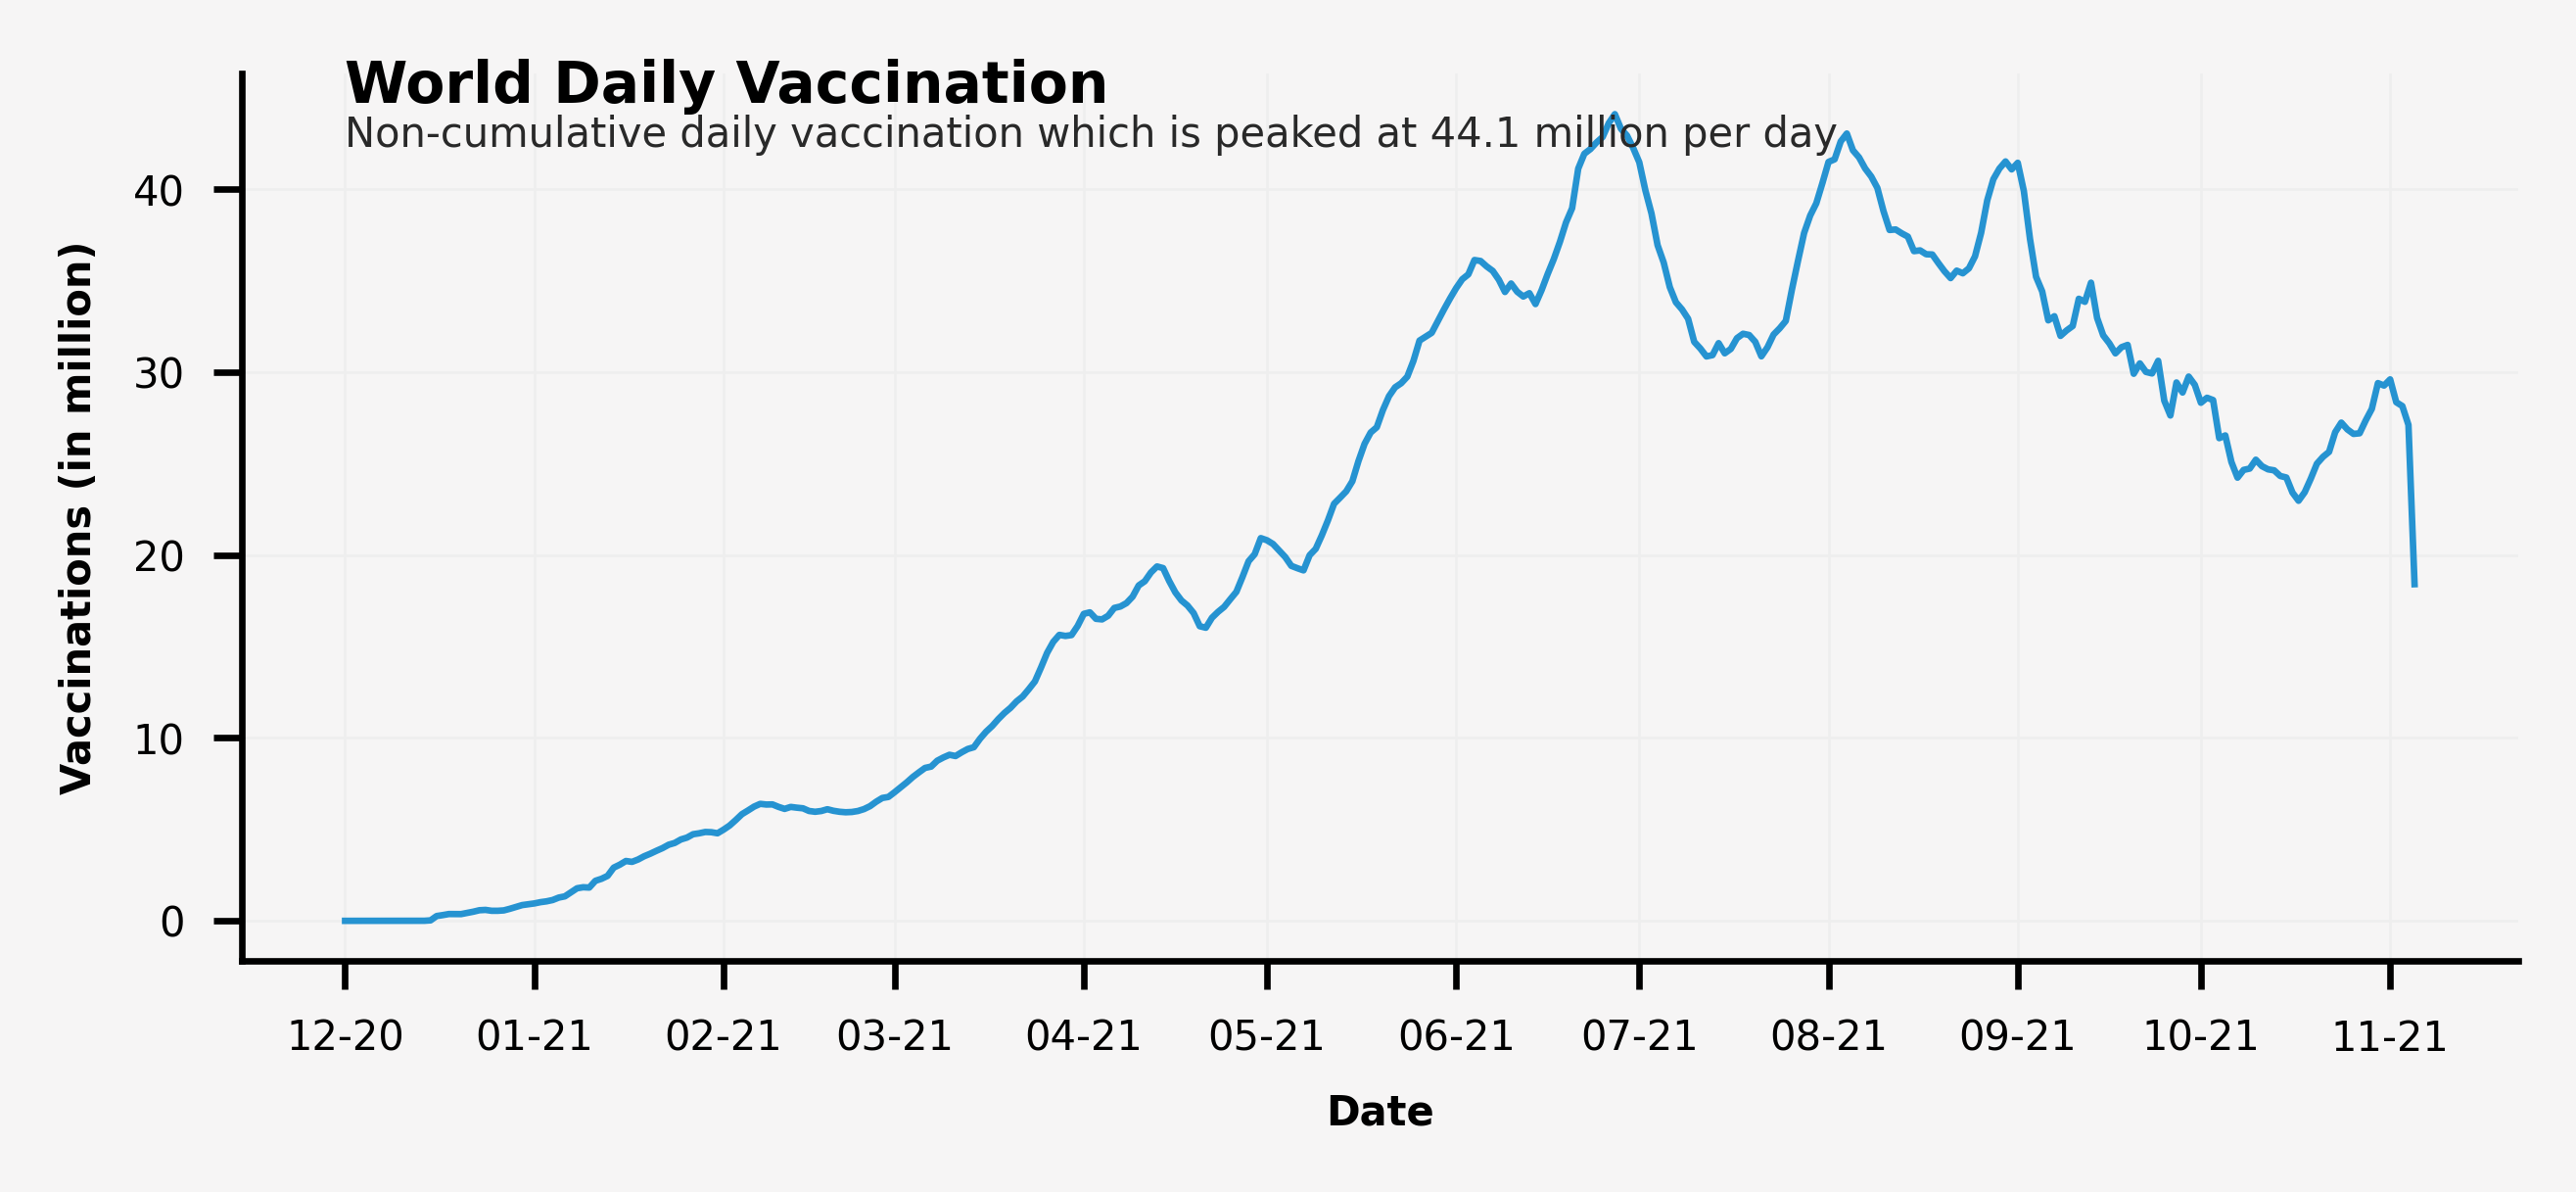

In [95]:
peak_vaccination = round(daily_vaccination.max(),1)
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
# format the ticks
ax0.xaxis.set_major_locator(months)
ax0.xaxis.set_major_formatter(years_fmt)

ax0.text(pd.Timestamp('2020-12-01'), peak_vaccination, 'World Daily Vaccination', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(pd.Timestamp('2020-12-01'), peak_vaccination, f'Non-cumulative daily vaccination which is peaked at {peak_vaccination} million per day', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.lineplot(ax=ax0, x=daily_vaccination.index, y=daily_vaccination, zorder=2, linewidth=0.8)
ax0_sns.set_xlabel("Date", fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccinations (in million)", fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

plt.show()


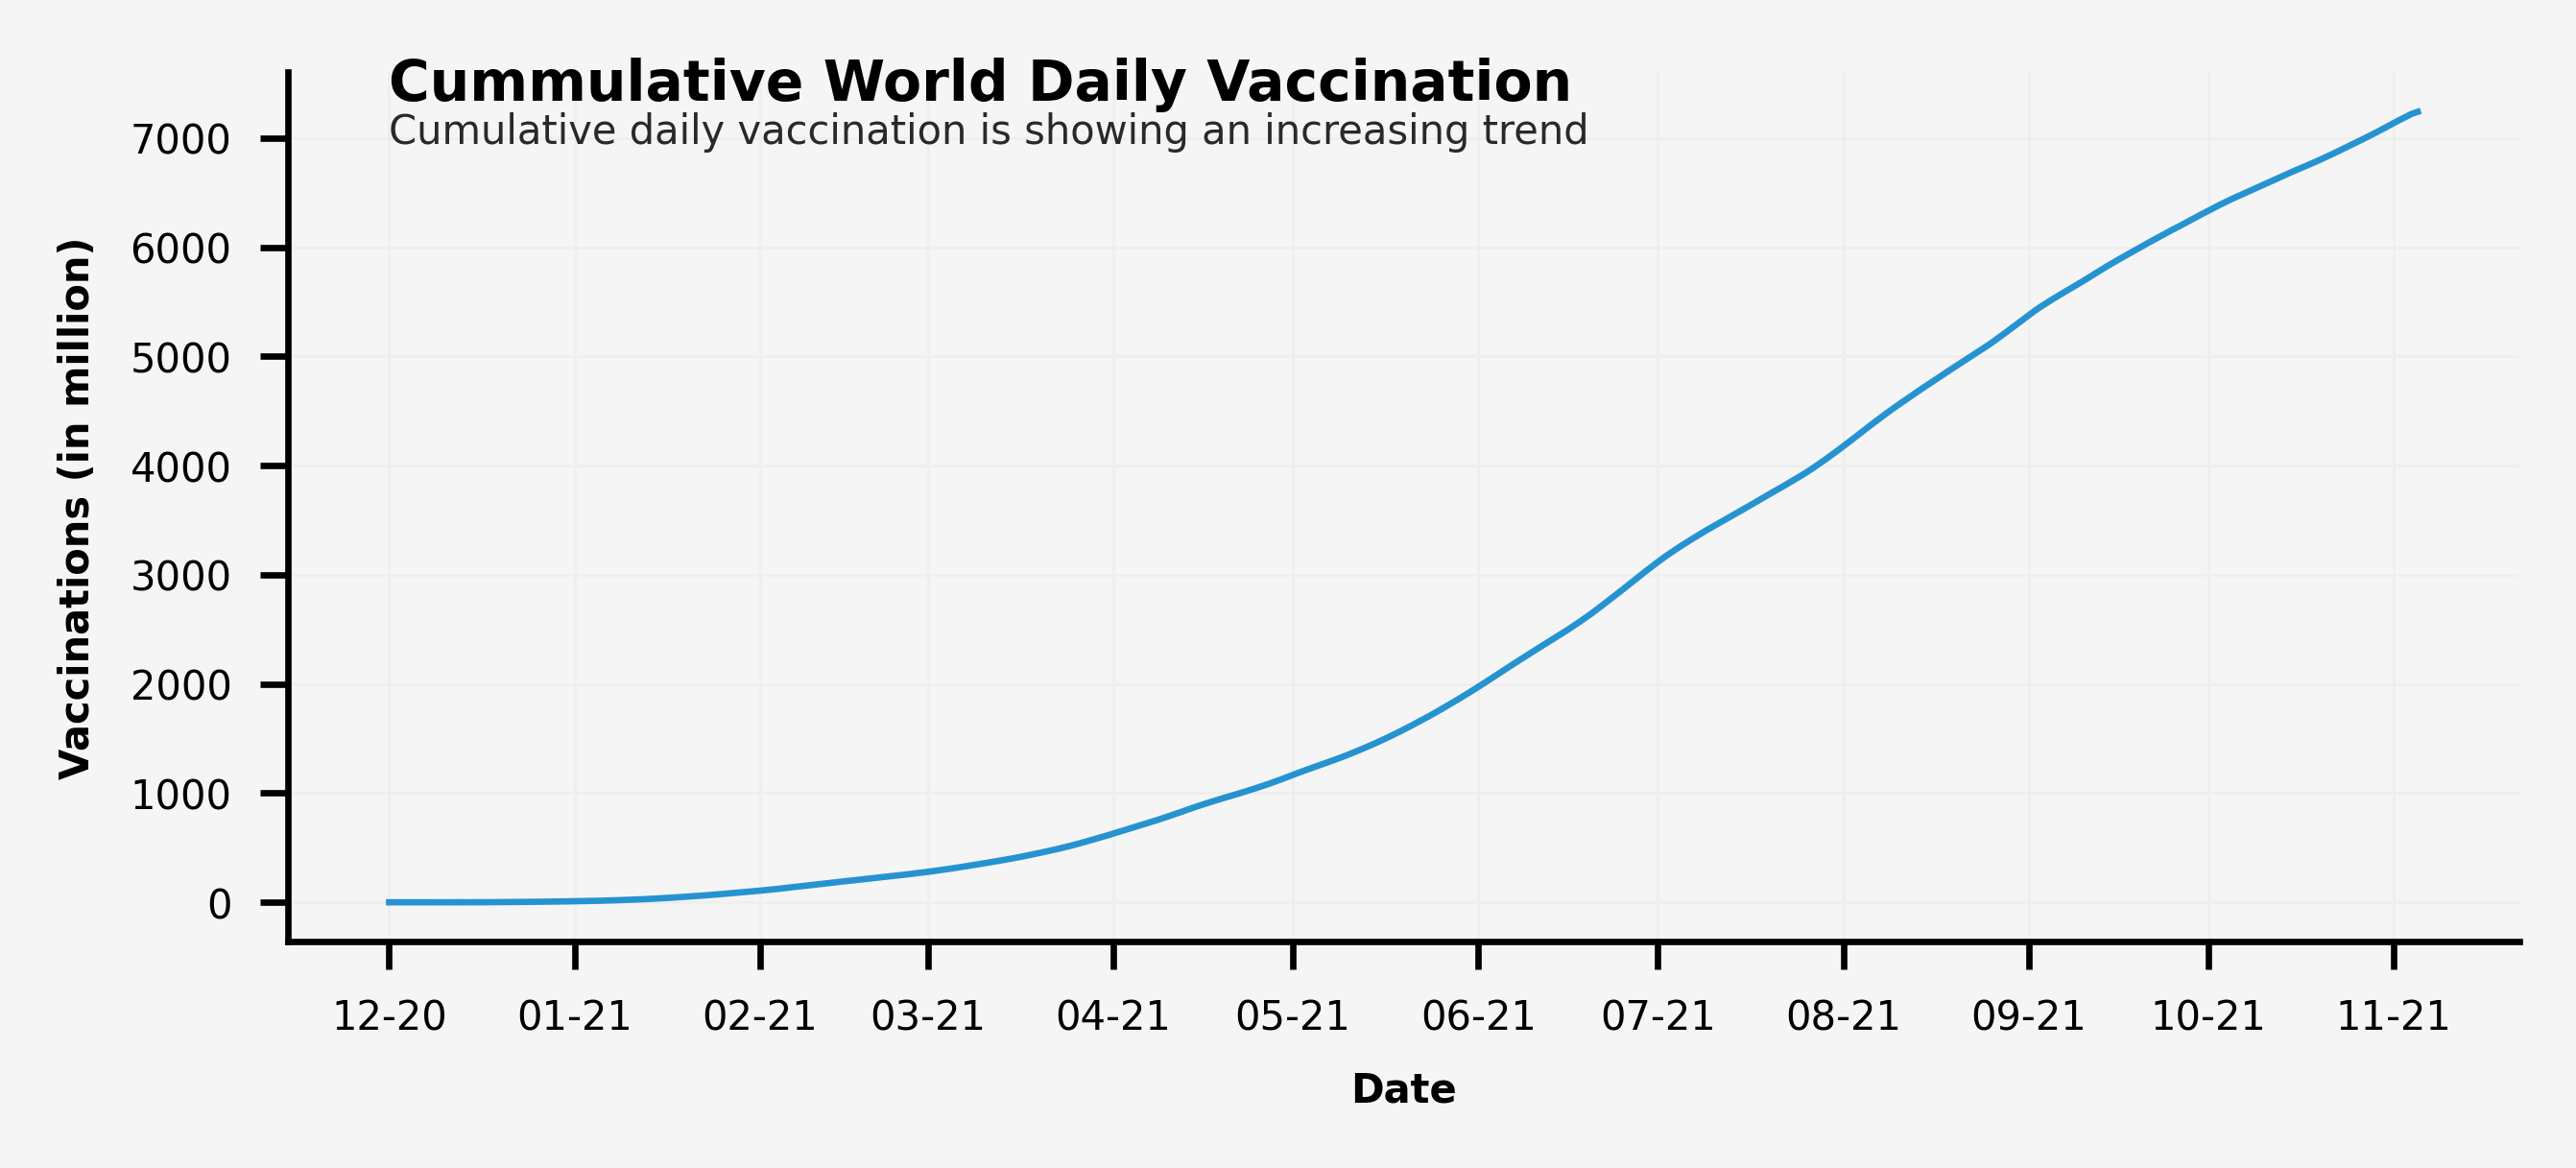

In [96]:
peak_vaccination = round(daily_vaccination.cumsum().max(),1)
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.xaxis.set_major_locator(months)
ax0.xaxis.set_major_formatter(years_fmt)

ax0.text(pd.Timestamp('2020-12-01'), peak_vaccination, 'Cummulative World Daily Vaccination', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(pd.Timestamp('2020-12-01'), peak_vaccination, 'Cumulative daily vaccination is showing an increasing trend', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.lineplot(ax=ax0, x=daily_vaccination.index, y=daily_vaccination.cumsum(), zorder=2, color='#2693d1', linewidth=0.8)
ax0_sns.set_xlabel("Date",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccinations (in million)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)
plt.show()

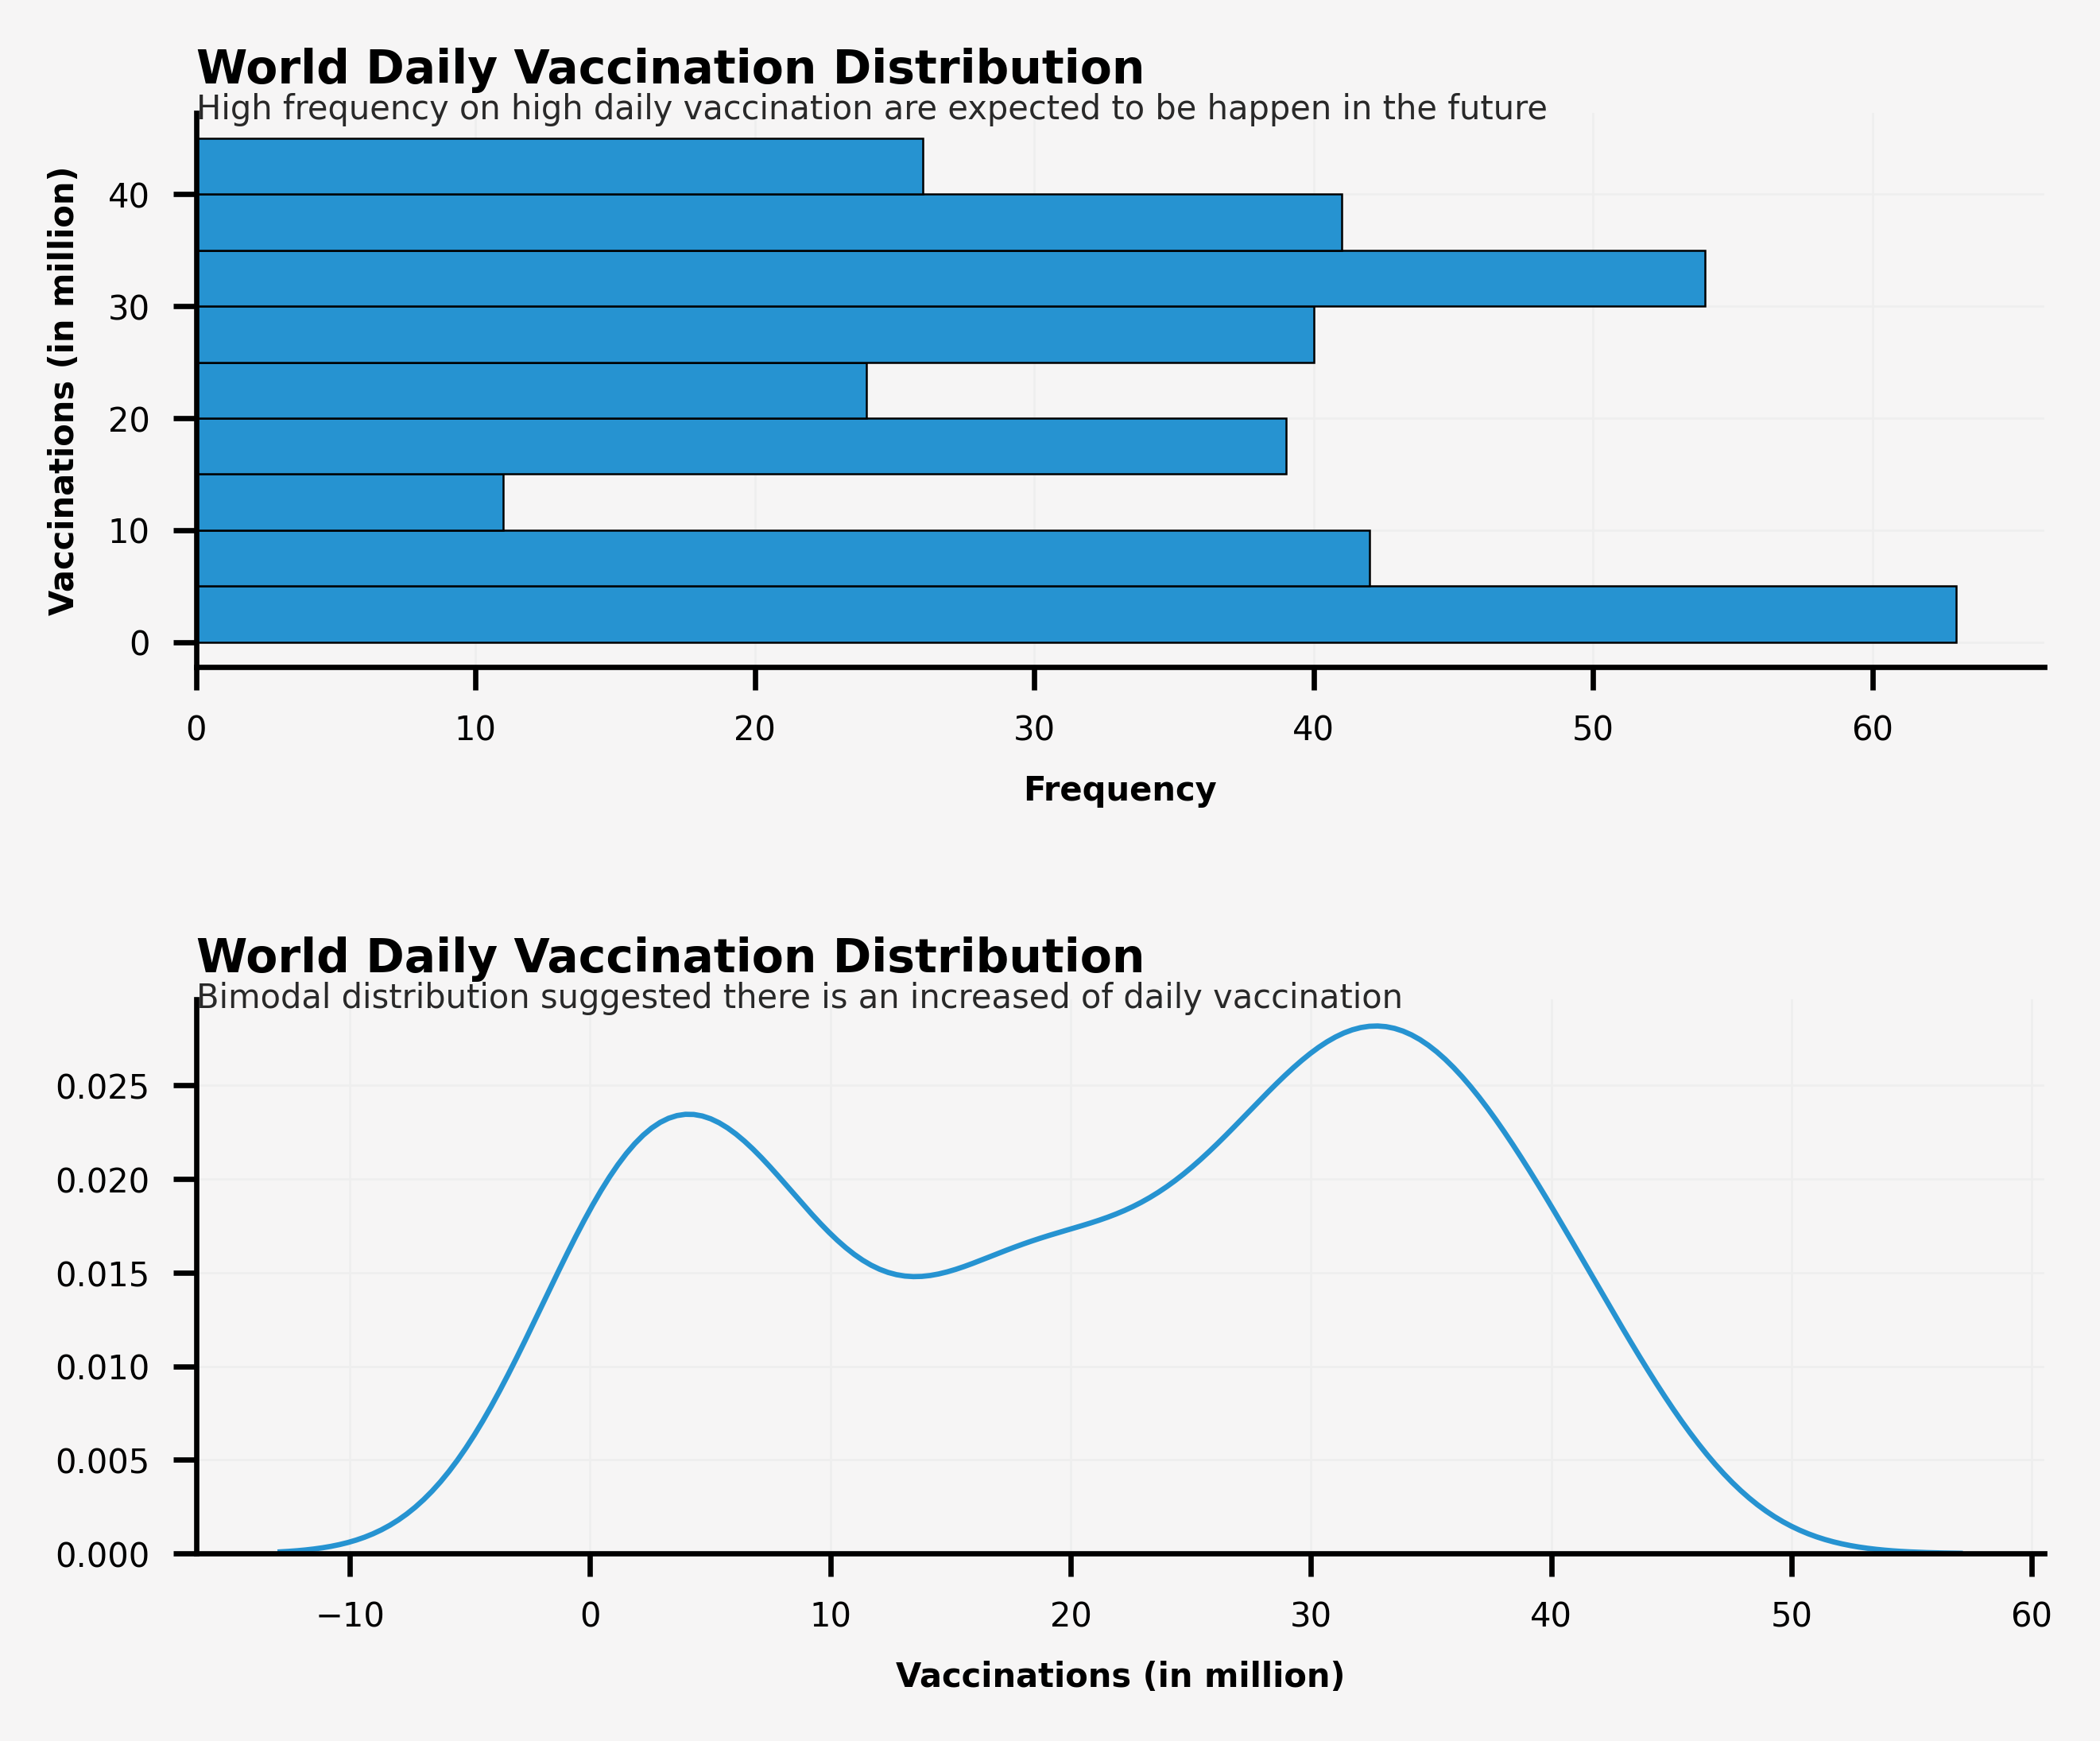

In [11]:
peak_vaccination = round(daily_vaccination.max(),1)

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 4), facecolor='#f6f5f5')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0, hspace=0.6)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.text(0, peak_vaccination+5, 'World Daily Vaccination Distribution', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(0, peak_vaccination+5, 'High frequency on high daily vaccination are expected to be happen in the future', color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.histplot(ax=ax0, y=daily_vaccination, zorder=2, binwidth=5, linewidth=0.3, edgecolor='black', alpha=1)
ax0_sns.set_xlabel("Frequency",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccinations (in million)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

ax0 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0_sns = sns.kdeplot(ax=ax0, x=daily_vaccination, zorder=2, linewidth=0.8, alpha=1)
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim() 
ax0.text(x0, y1+0.001, 'World Daily Vaccination Distribution', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(x0, y1+0.001, 'Bimodal distribution suggested there is an increased of daily vaccination', color='#292929', fontsize=5, ha='left', va='top')

ax0_sns.set_xlabel("Vaccinations (in million)", fontsize=5, weight='bold')
ax0_sns.set_ylabel("", fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)
plt.show()

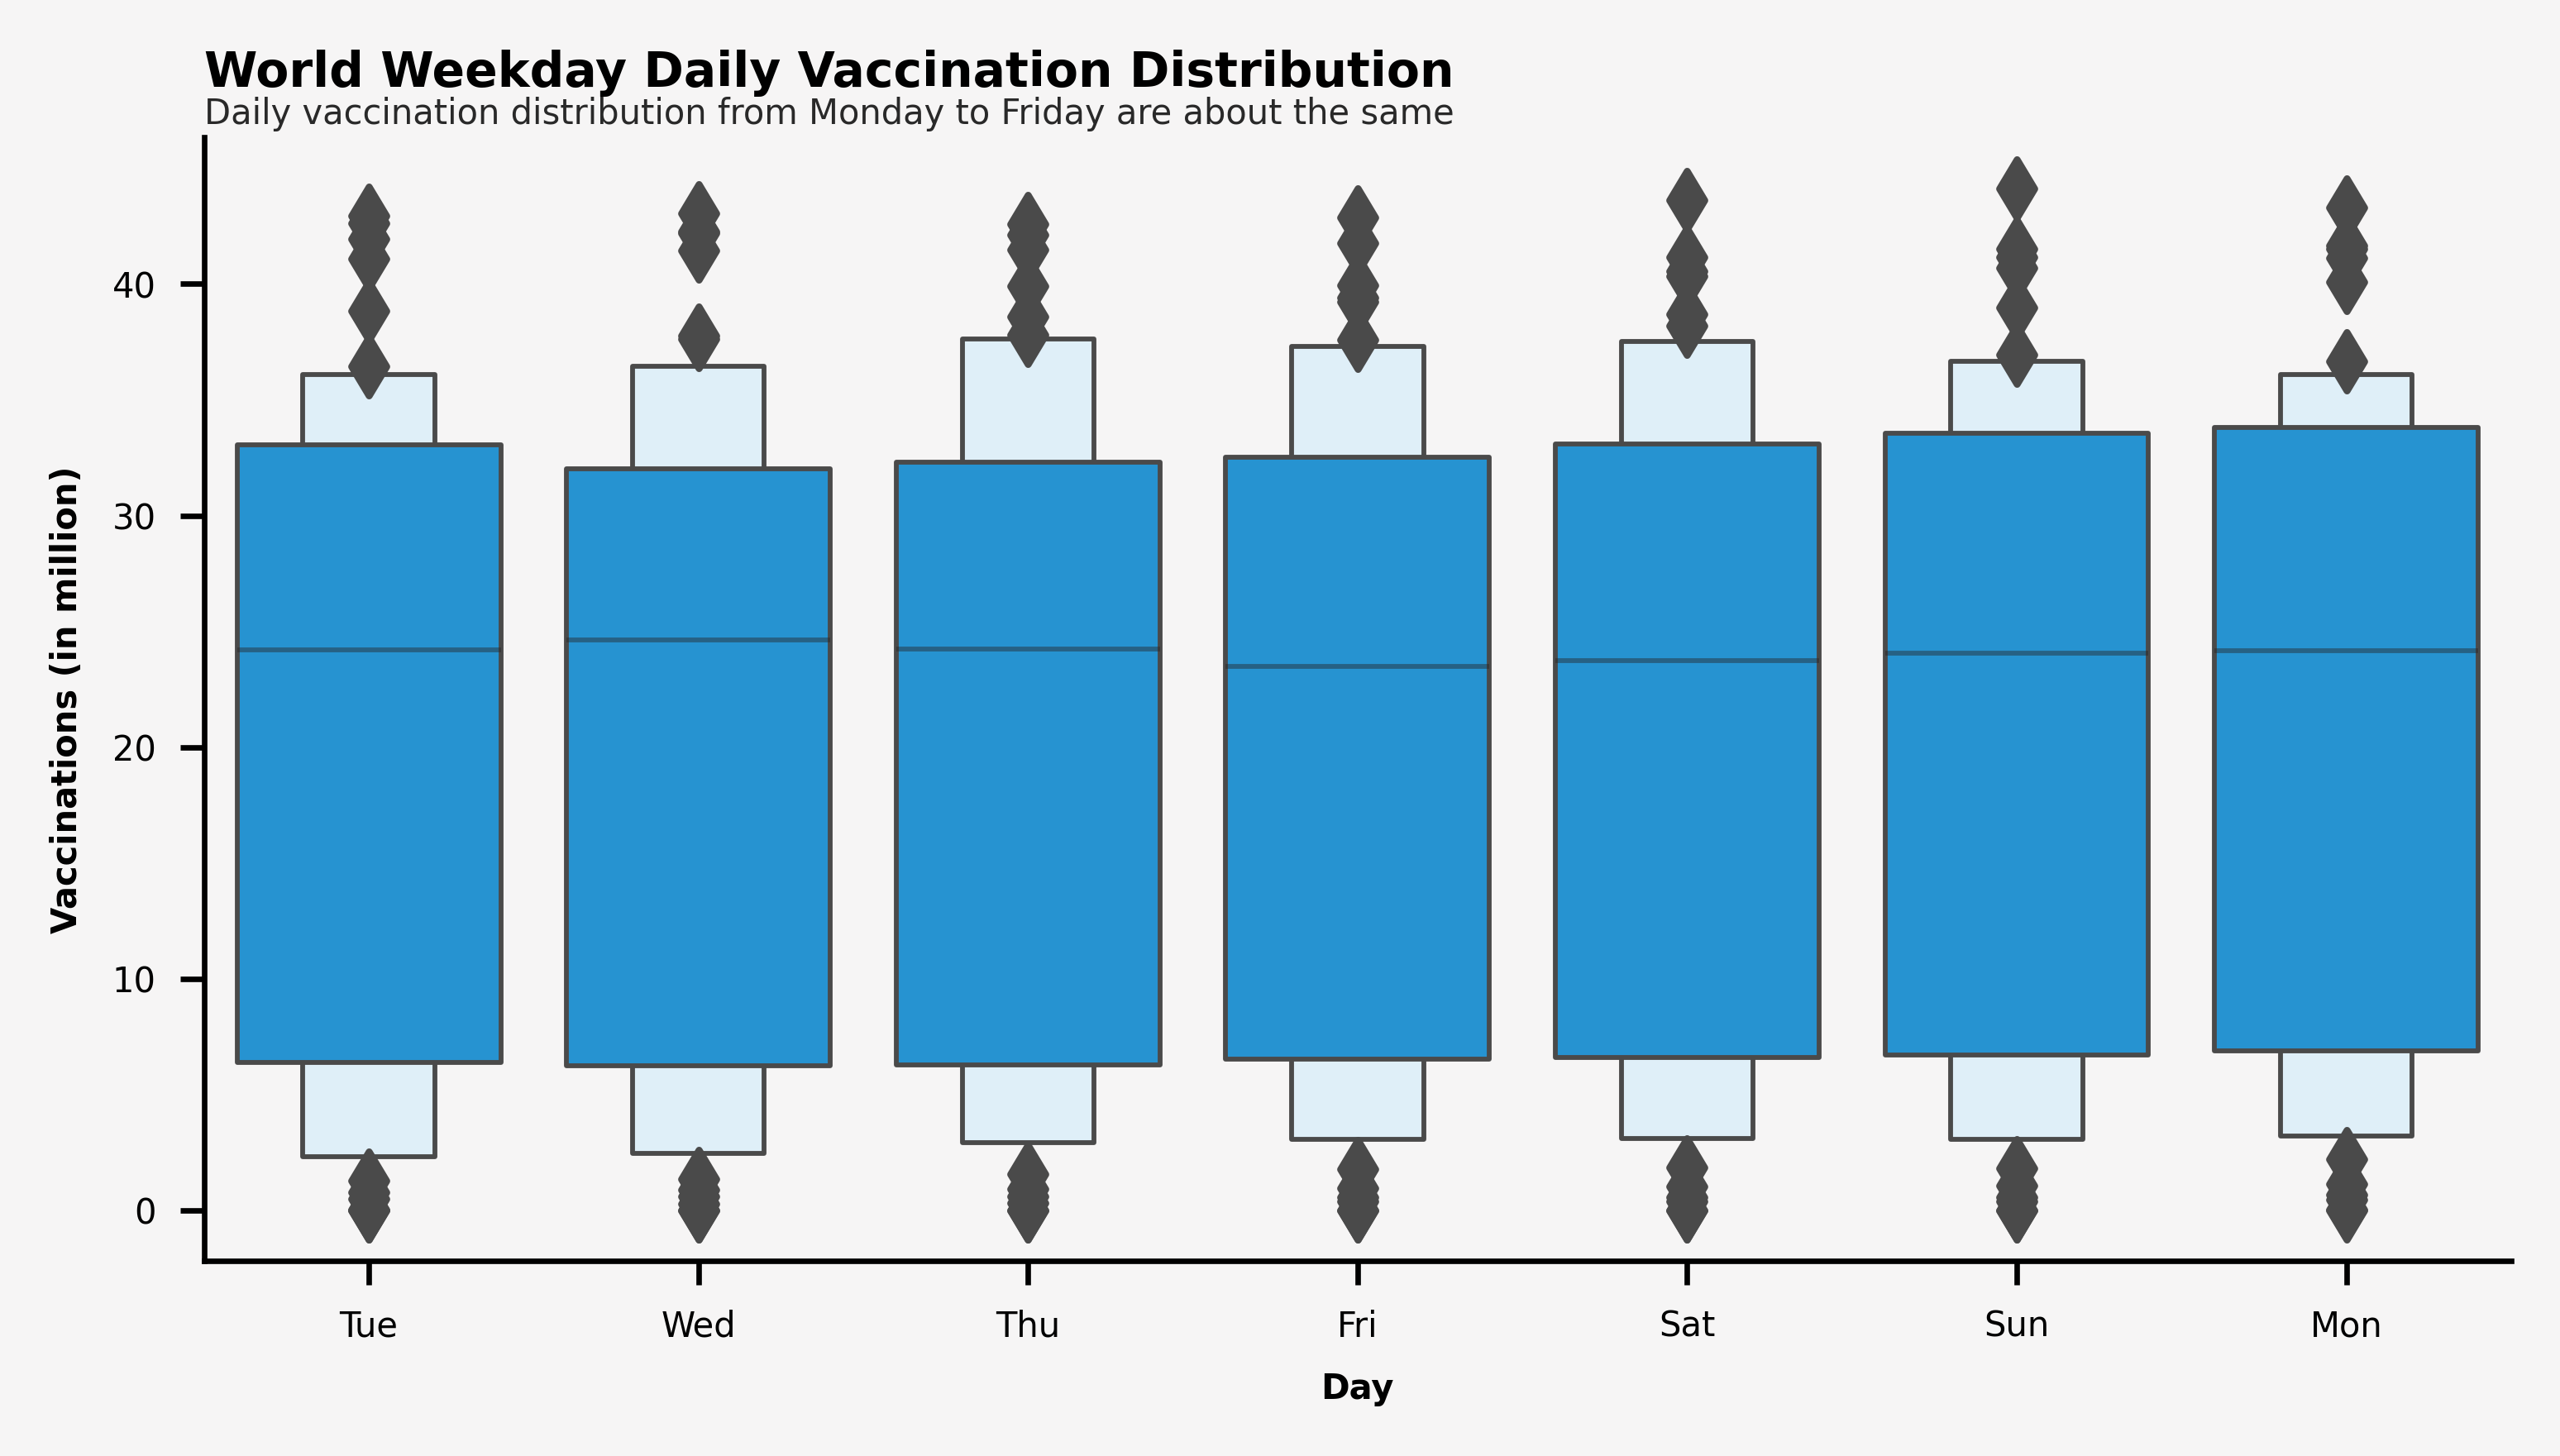

In [12]:
daily_vaccination = pd.DataFrame(daily_vaccination).reset_index(drop=False)
daily_vaccination['weekday'] = daily_vaccination['date'].dt.dayofweek
weekday = {0: 'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
daily_vaccination['weekday'] = daily_vaccination['weekday'].map(weekday)
background_color = "#f6f5f5"

color_map = ["#2693d1" for _ in range(7)]
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(6, 3), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.text(-0.5, peak_vaccination+4, 'World Weekday Daily Vaccination Distribution', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-0.5, peak_vaccination+4, 'Daily vaccination distribution from Monday to Friday are about the same', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.boxenplot(ax=ax0, x=daily_vaccination['weekday'], y=daily_vaccination['daily_vaccinations'], 
                        zorder=3, linewidth=0.7, saturation=1)
ax0_sns.set_xlabel("Day",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccinations (in million)",fontsize=5, weight='bold')
ax0_sns.tick_params(labelsize=5)

plt.show()

0.0 2431.626
1.0 1197.793623
2.0 548.00654
3.0 399.979569
4.0 321.51203699999996


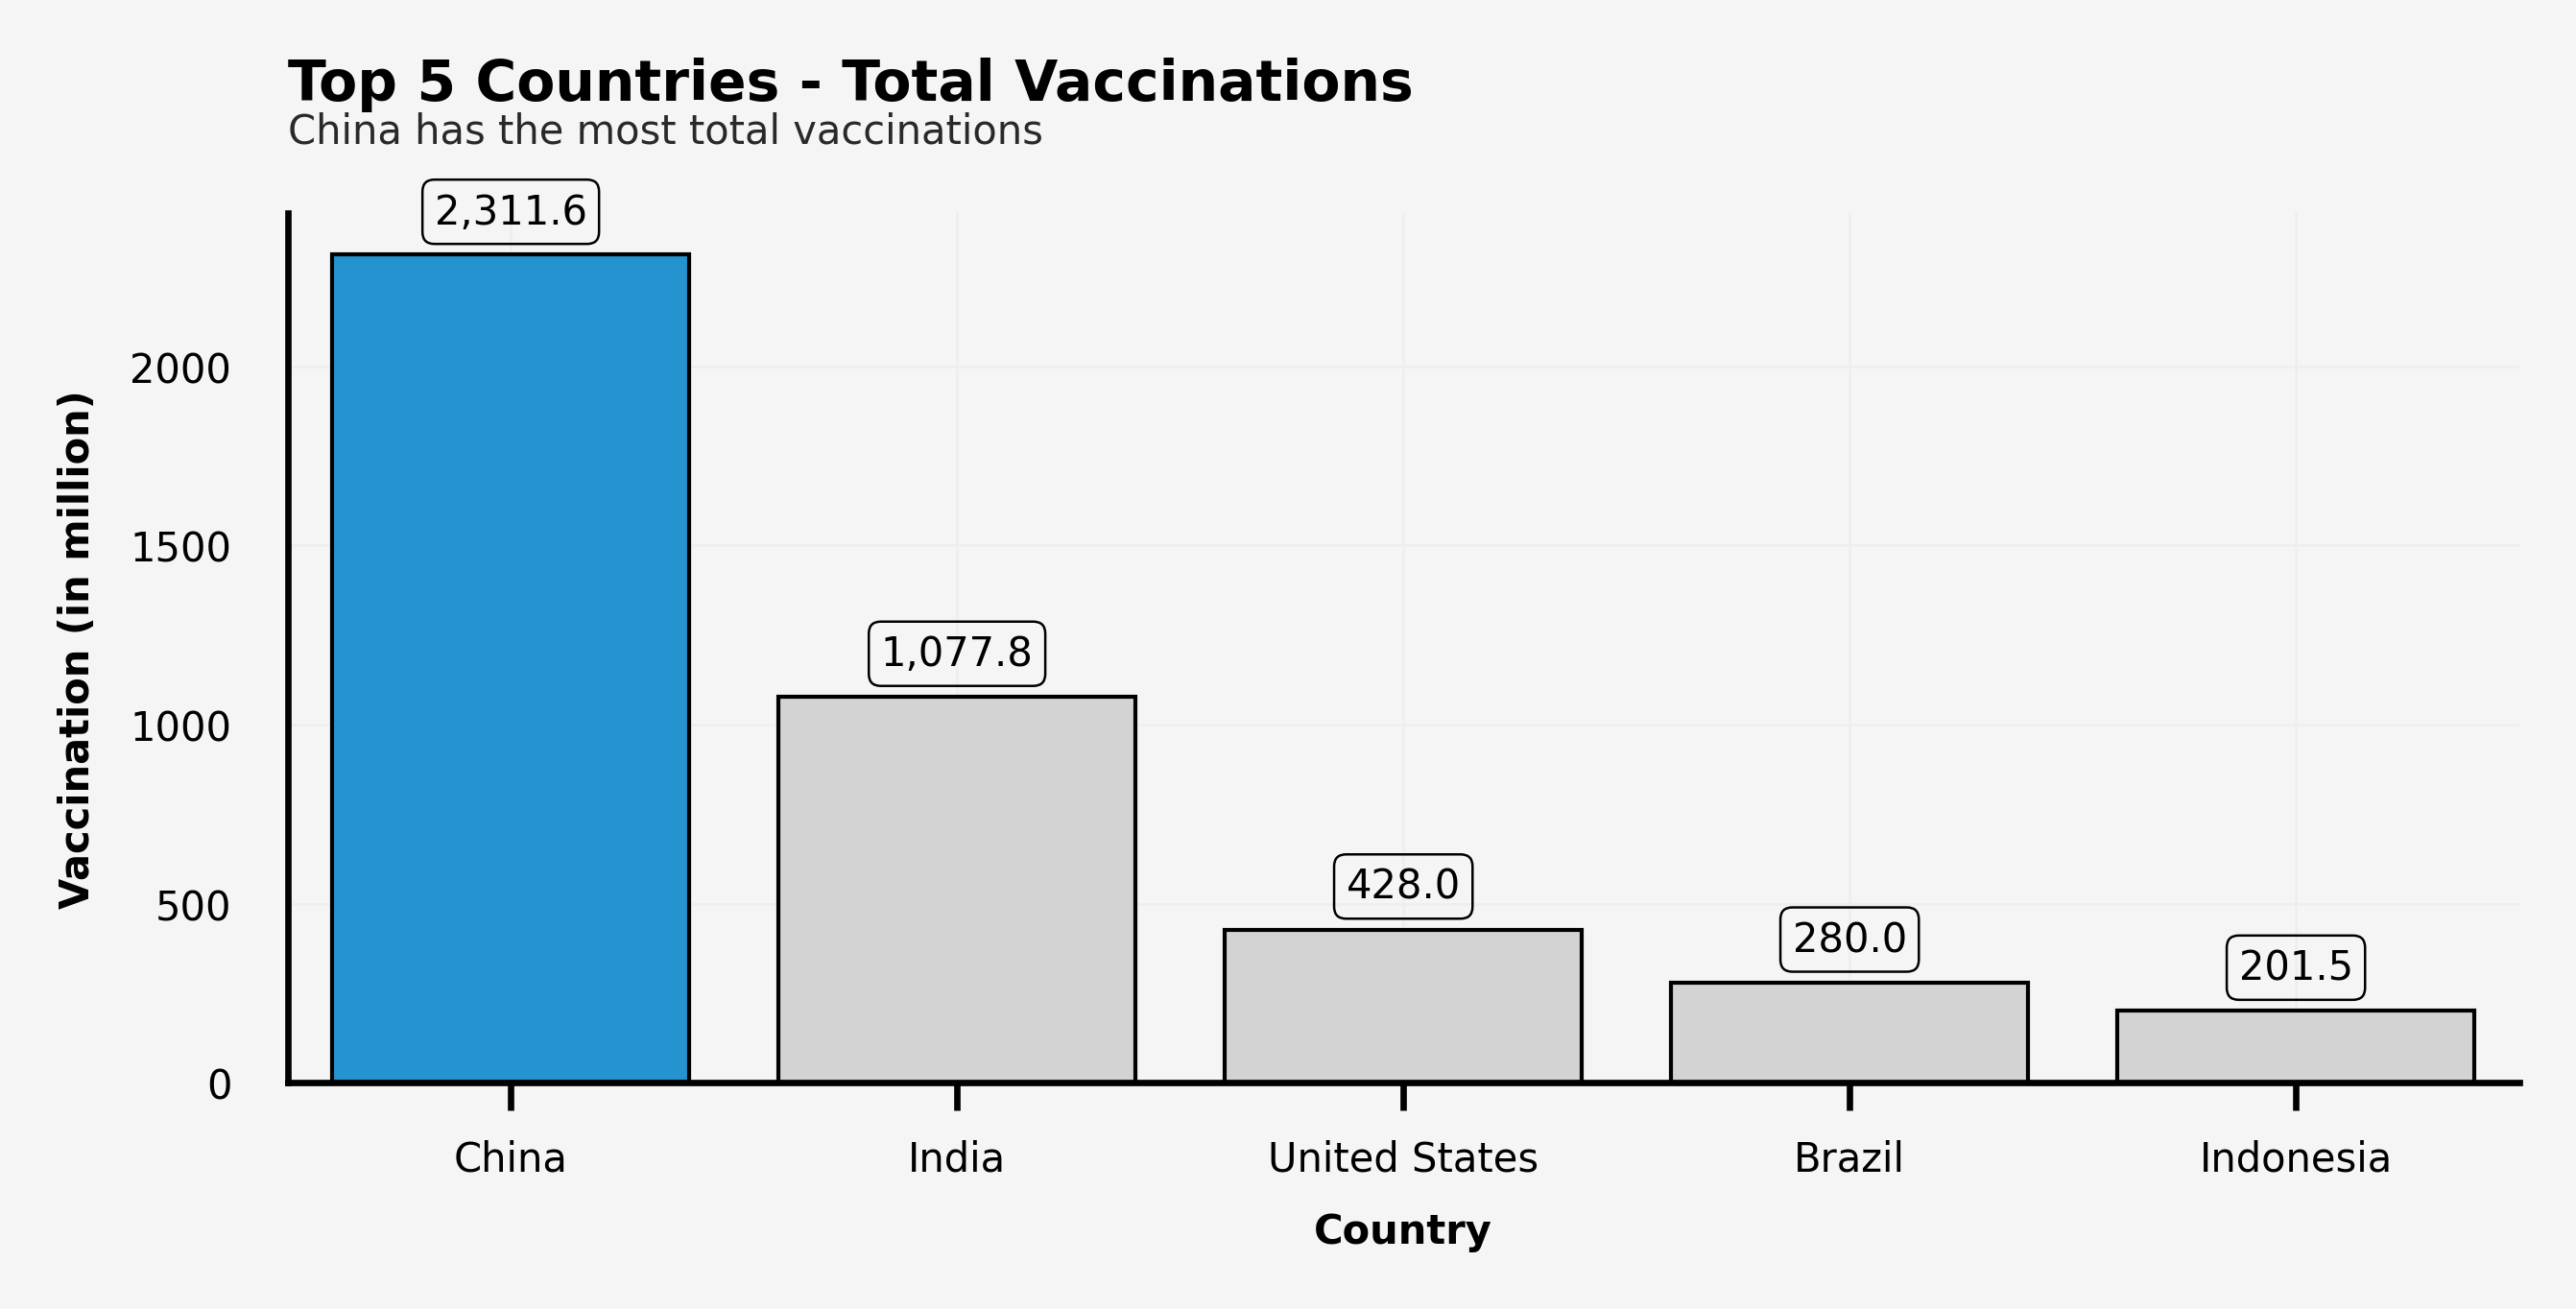

In [13]:
top5_countries_total_vaccination = data_lastest.sort_values('total_vaccinations', ascending=False)
top5_countries_total_vaccination = top5_countries_total_vaccination[:5]
top5_countries_total_vaccination
x_label = round(top5_countries_total_vaccination.head(1)['total_vaccinations']/1000000)
top_country = top5_countries_total_vaccination.head(1)['country'].values[0]
background_color = "#f6f5f5"
color_map = ["lightgray" for _ in range(5)]
color_map[0] = "#2693d1"
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = "y", which = "both", left = False)

ax0.text(-0.5, x_label+400, 'Top 5 Countries - Total Vaccinations', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-0.5, x_label+400, f'{top_country} has the most total vaccinations', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, x=top5_countries_total_vaccination['country'], 
                      y=top5_countries_total_vaccination['total_vaccinations']/1000000, zorder=2, 
                      linewidth=0.5, edgecolor='black', saturation=1)
ax0_sns.set_xlabel("Country",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccination (in million)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

for p in ax0.patches:
    value = f'{p.get_height():,.1f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 120
    print(x, y)
    ax0.text(x, y, value, ha='center', va='center', fontsize=5, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()

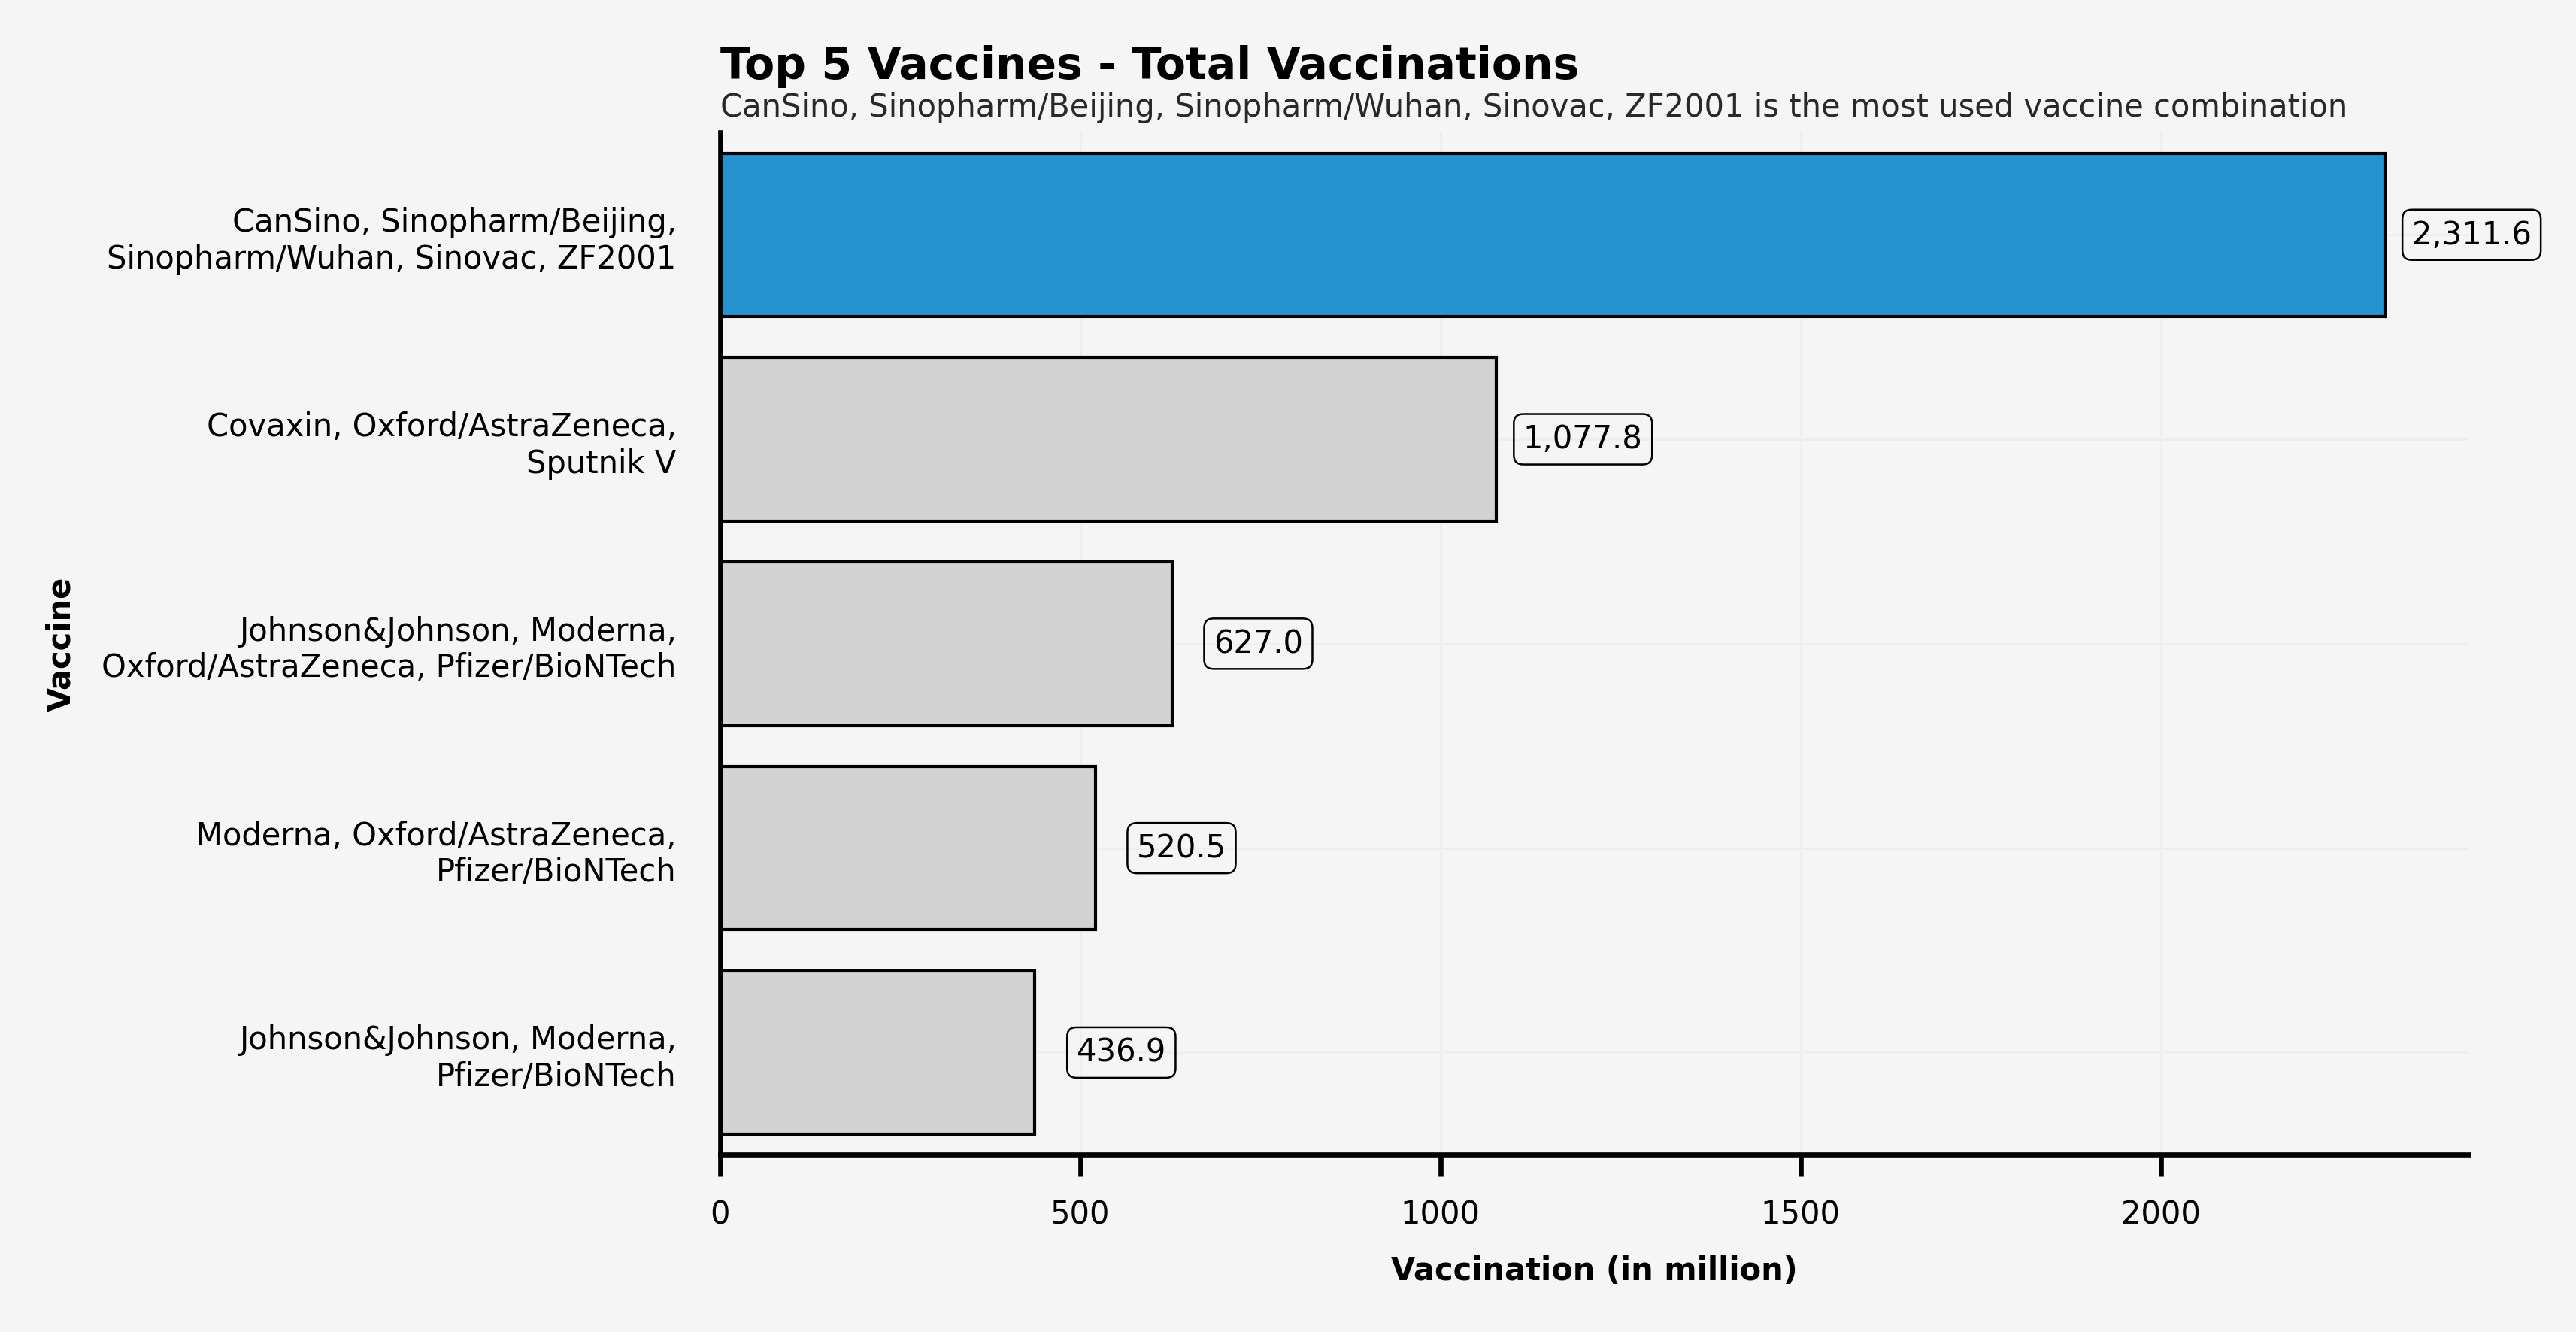

In [14]:
comb_vaccine = data_lastest.groupby('vaccines')['total_vaccinations'].sum().sort_values(ascending=False)
comb_vaccine = comb_vaccine/1000000
comb_vaccine = comb_vaccine[:5]
top_vaccine = comb_vaccine.head(1).index[0]
background_color = "#f6f5f5"
color_map = ["lightgray" for _ in range(26)]
color_map[0] = "#2693d1"
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 3), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = "y", which = "both", left = False)

ax0.text(0, -0.72, 'Top 5 Vaccines - Total Vaccinations', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(0, -0.7, f'{top_vaccine} is the most used vaccine combination', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, y=comb_vaccine.index, x=comb_vaccine, zorder=2, orient='h', 
                      linewidth=0.5, edgecolor='black', saturation=1)
ax0_sns.set_xlabel("Vaccination (in million)",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccine",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)
ax0.set_yticklabels([textwrap.fill(e, 35) for e in comb_vaccine.index])

for p in ax0.patches:
    value = f'{p.get_width():,.1f}'
    x = p.get_x() + p.get_width() + 120
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=5, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()

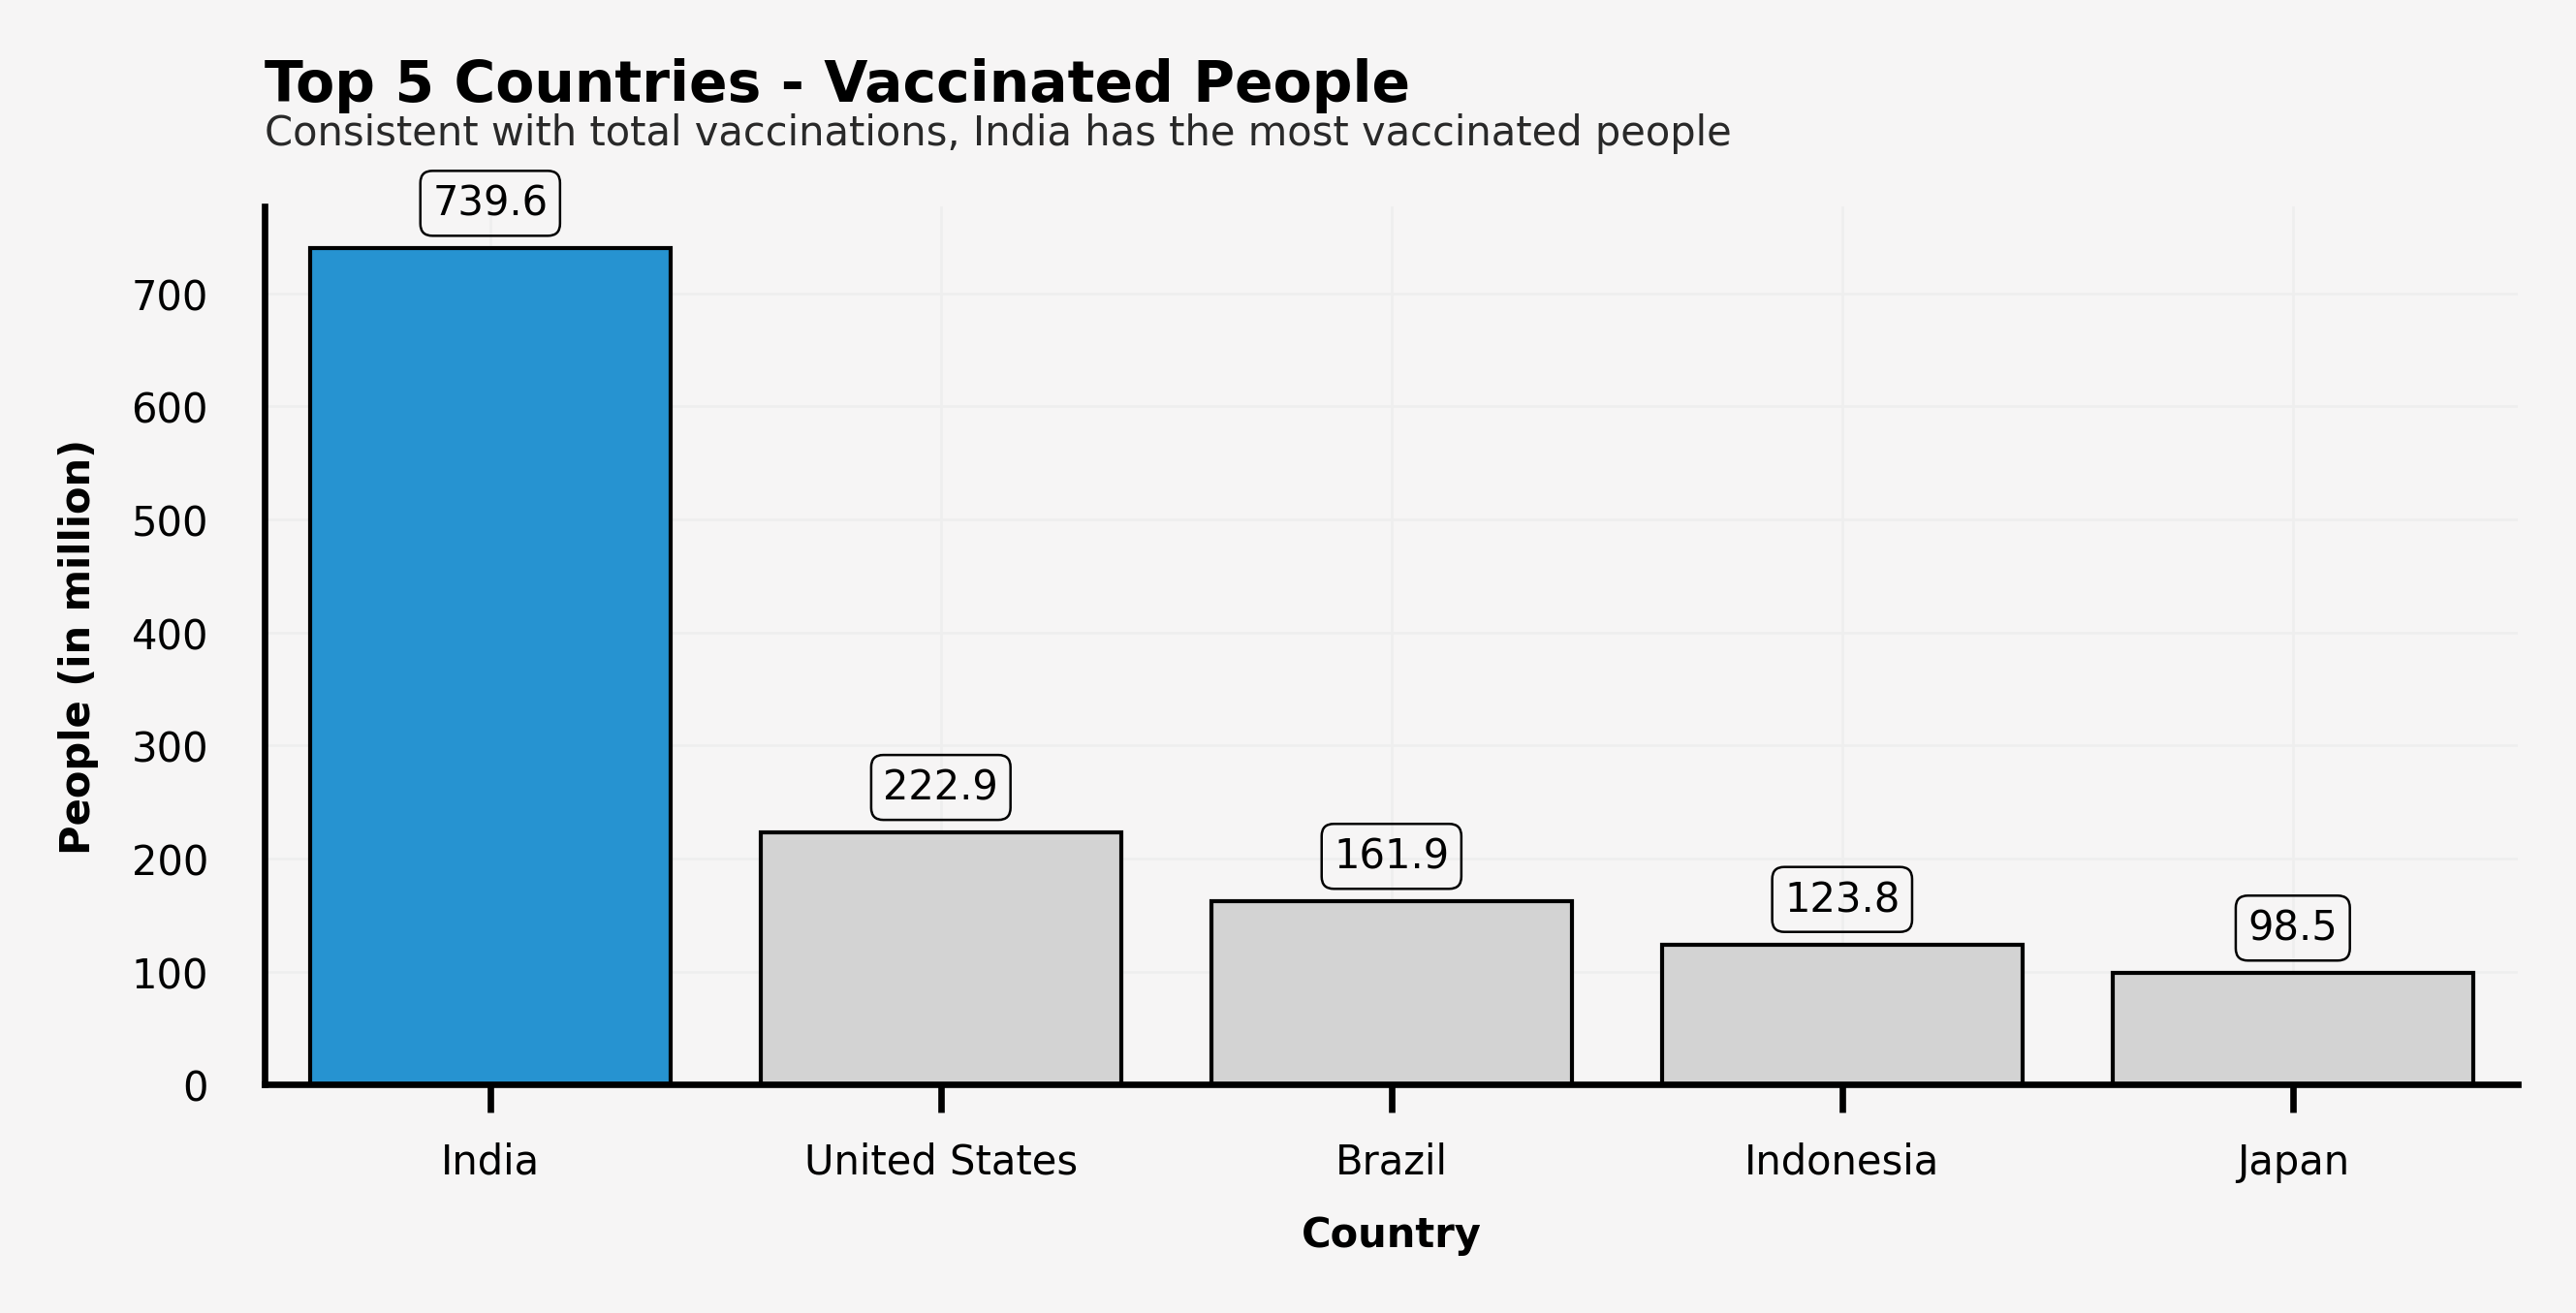

In [31]:
top5_countries_vaccinated = data_lastest.sort_values('people_vaccinated', ascending=False)
top5_countries_vaccinated = top5_countries_vaccinated[:5]
x_label = round(top5_countries_vaccinated.head(1)['people_vaccinated']/1000000)
top_country = top5_countries_vaccinated.head(1)['country'].values[0]
background_color = "#f6f5f5"
color_map = ["lightgray" for _ in range(5)]
color_map[0] = "#2693d1"
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = "y", which = "both", left = False)

ax0.text(-0.5, x_label+120, 'Top 5 Countries - Vaccinated People', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-0.5, x_label+120, f'Consistent with total vaccinations, {top_country} has the most vaccinated people', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, x=top5_countries_vaccinated['country'], y=top5_countries_vaccinated['people_vaccinated']/1000000, 
                      zorder=2, linewidth=0.5, edgecolor='black', saturation=1)
ax0_sns.set_xlabel("Country",fontsize=5, weight='bold')
ax0_sns.set_ylabel("People (in million)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

for p in ax0.patches:
    value = f'{p.get_height():,.1f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 40
    ax0.text(x, y, value, ha='center', va='center', fontsize=5, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()

In [30]:
top5_countries_vaccinated.head(1)['country'].values[0]

'India'

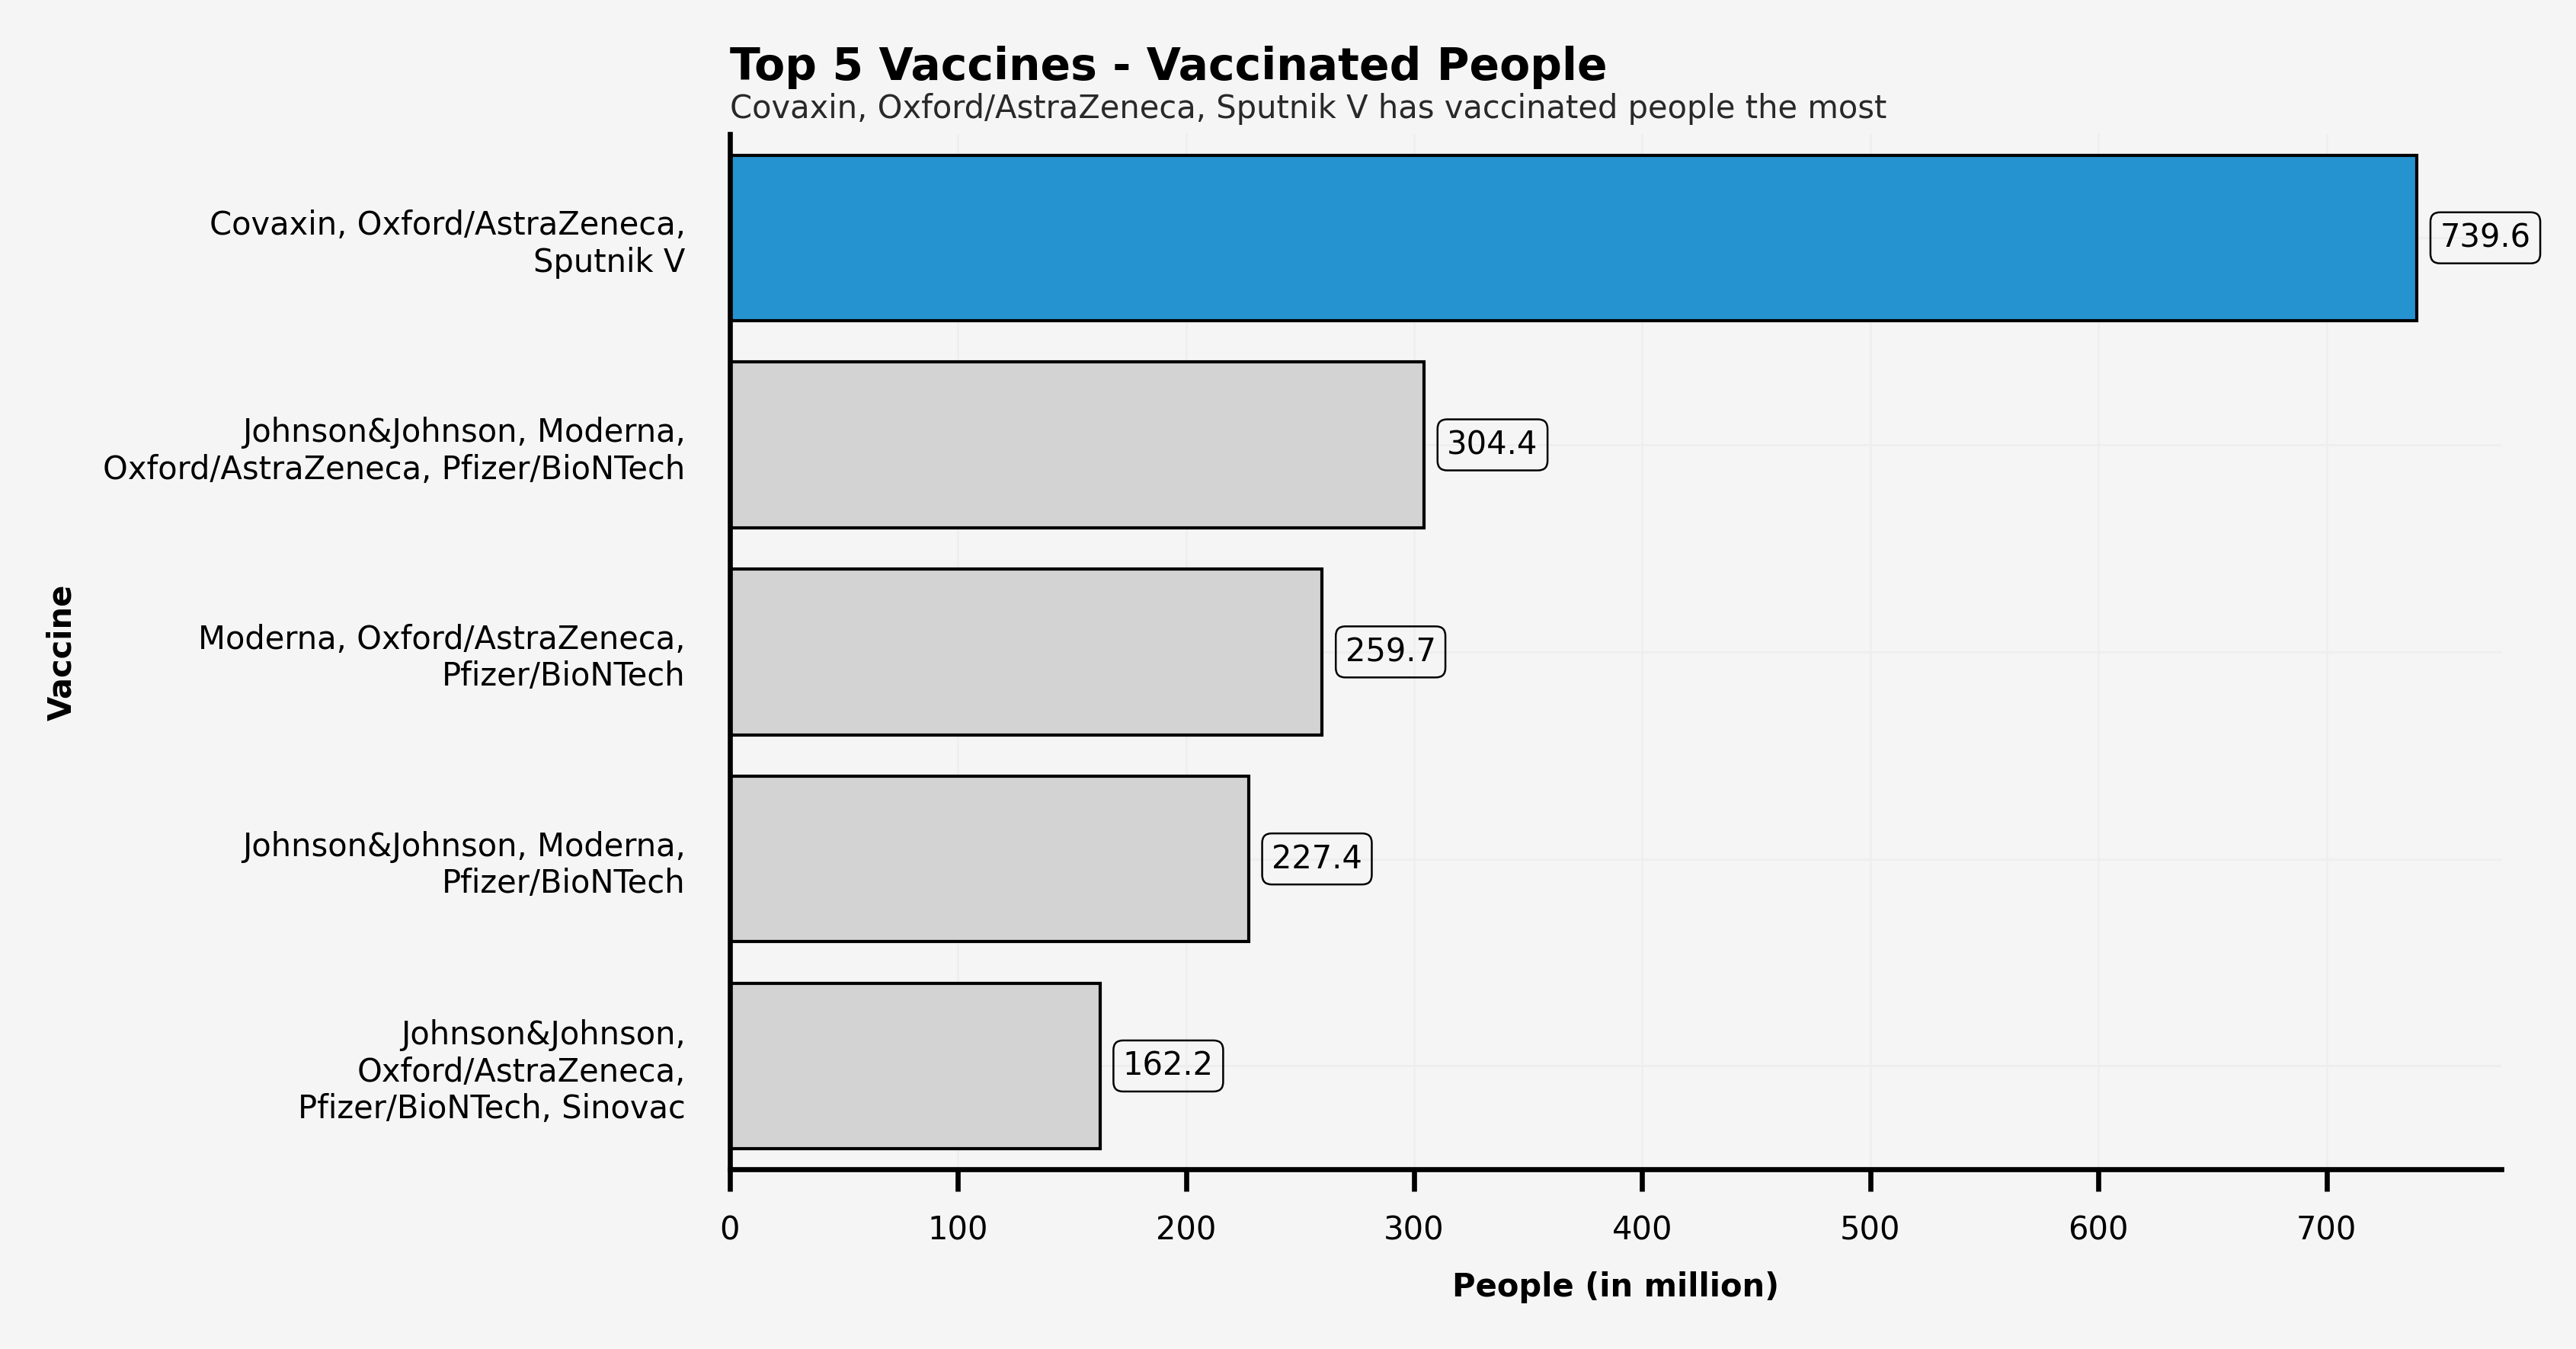

In [16]:

comb_vaccine = data_lastest.groupby('vaccines')['people_vaccinated'].sum().sort_values(ascending=False)
comb_vaccine = comb_vaccine/1000000
comb_vaccine = comb_vaccine[:5]
top_vaccine = comb_vaccine.head(1).index[0]
background_color = "#f6f5f5"
color_map = ["lightgray" for _ in range(26)]
color_map[0] = "#2693d1"
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 3), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = "y", which = "both", left = False)

ax0.text(0, -0.72, 'Top 5 Vaccines - Vaccinated People', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(0, -0.7, f'{top_vaccine} has vaccinated people the most', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, y=comb_vaccine.index, x=comb_vaccine, zorder=2, orient='h', 
                      linewidth=0.5, edgecolor='black', saturation=1)
ax0_sns.set_xlabel("People (in million)",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccine",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)
ax0.set_yticklabels([textwrap.fill(e, 35) for e in comb_vaccine.index])

for p in ax0.patches:
    value = f'{p.get_width():,.1f}'
    x = p.get_x() + p.get_width() + 30
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=5, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()

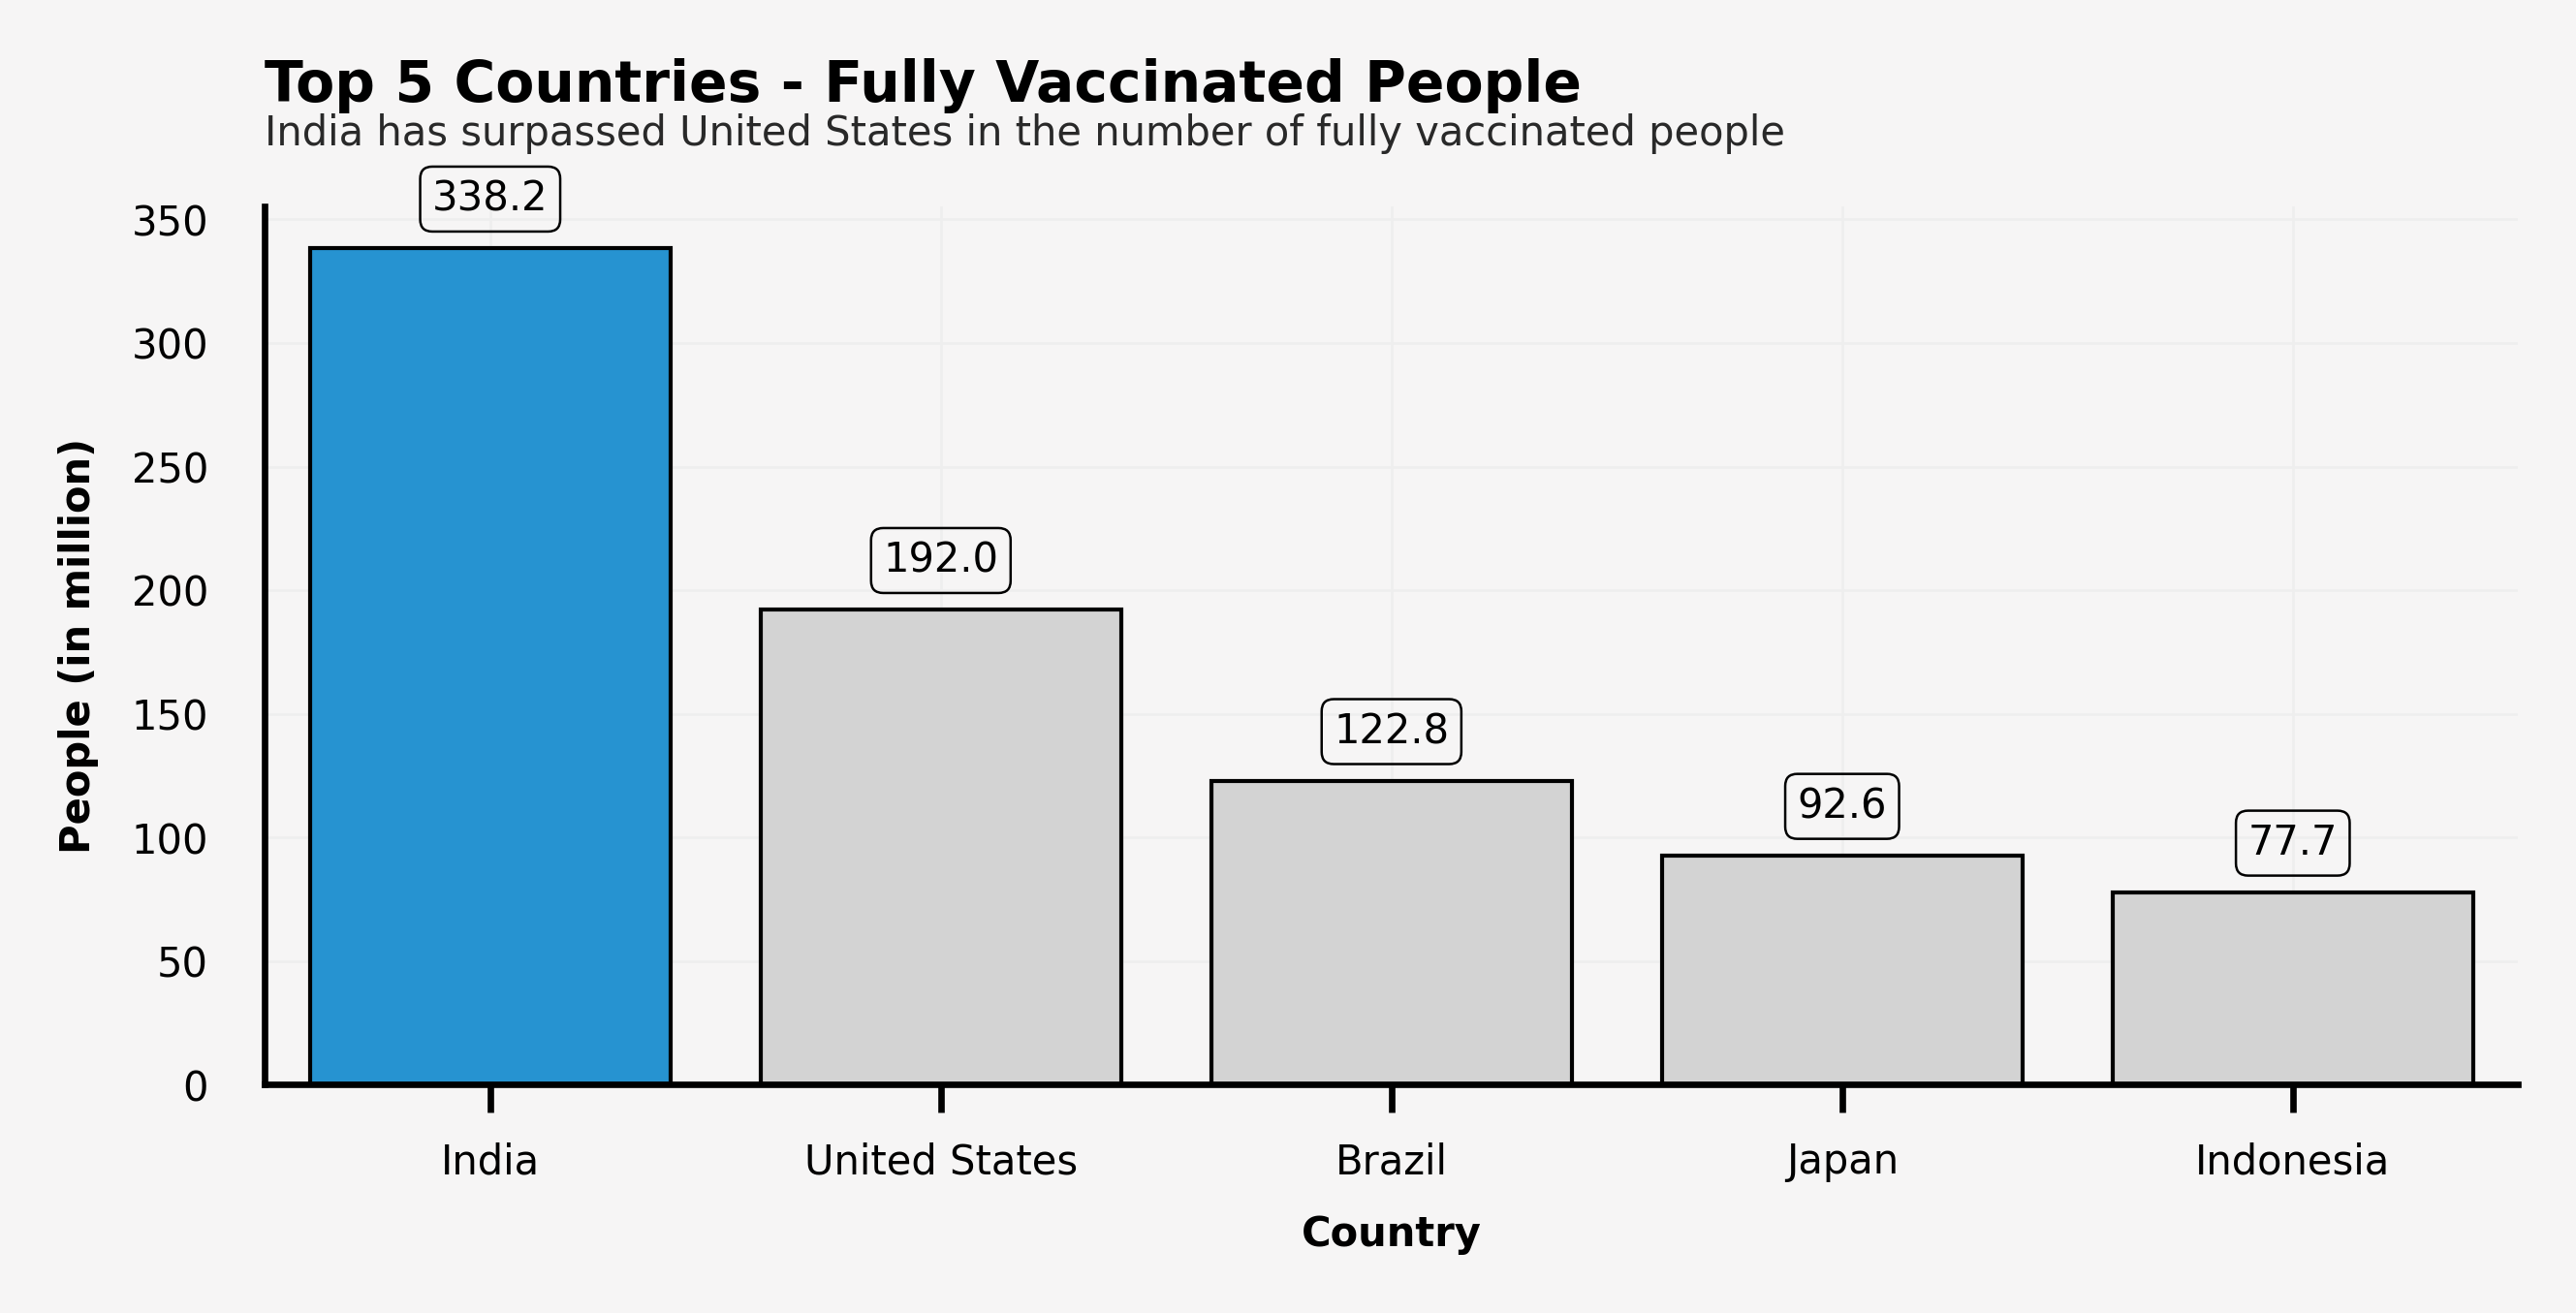

In [37]:

top5_countries_fully_vaccinated = data_lastest.sort_values('people_fully_vaccinated', ascending=False)
top5_countries_fully_vaccinated = top5_countries_fully_vaccinated[:5]
x_label = round(top5_countries_fully_vaccinated.head(1)['people_fully_vaccinated'].values[0]/1000000)
top_country = top5_countries_fully_vaccinated.head(2)['country'].values[0]
second_country = top5_countries_fully_vaccinated.head(2)['country'].values[1]

background_color = "#f6f5f5"
color_map = ["lightgray" for _ in range(5)]
color_map[0] = "#2693d1"
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = "y", which = "both", left = False)

ax0.text(-0.5, x_label+55, 'Top 5 Countries - Fully Vaccinated People', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-0.5, x_label+55, f'{top_country} has surpassed {second_country} in the number of fully vaccinated people ', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, x=top5_countries_fully_vaccinated['country'], y=top5_countries_fully_vaccinated['people_fully_vaccinated']/1000000, 
                      zorder=2, linewidth=0.5, edgecolor='black', saturation=1)
ax0_sns.set_xlabel("Country",fontsize=5, weight='bold')
ax0_sns.set_ylabel("People (in million)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

for p in ax0.patches:
    value = f'{p.get_height():,.1f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 20
    ax0.text(x, y, value, ha='center', va='center', fontsize=5, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()

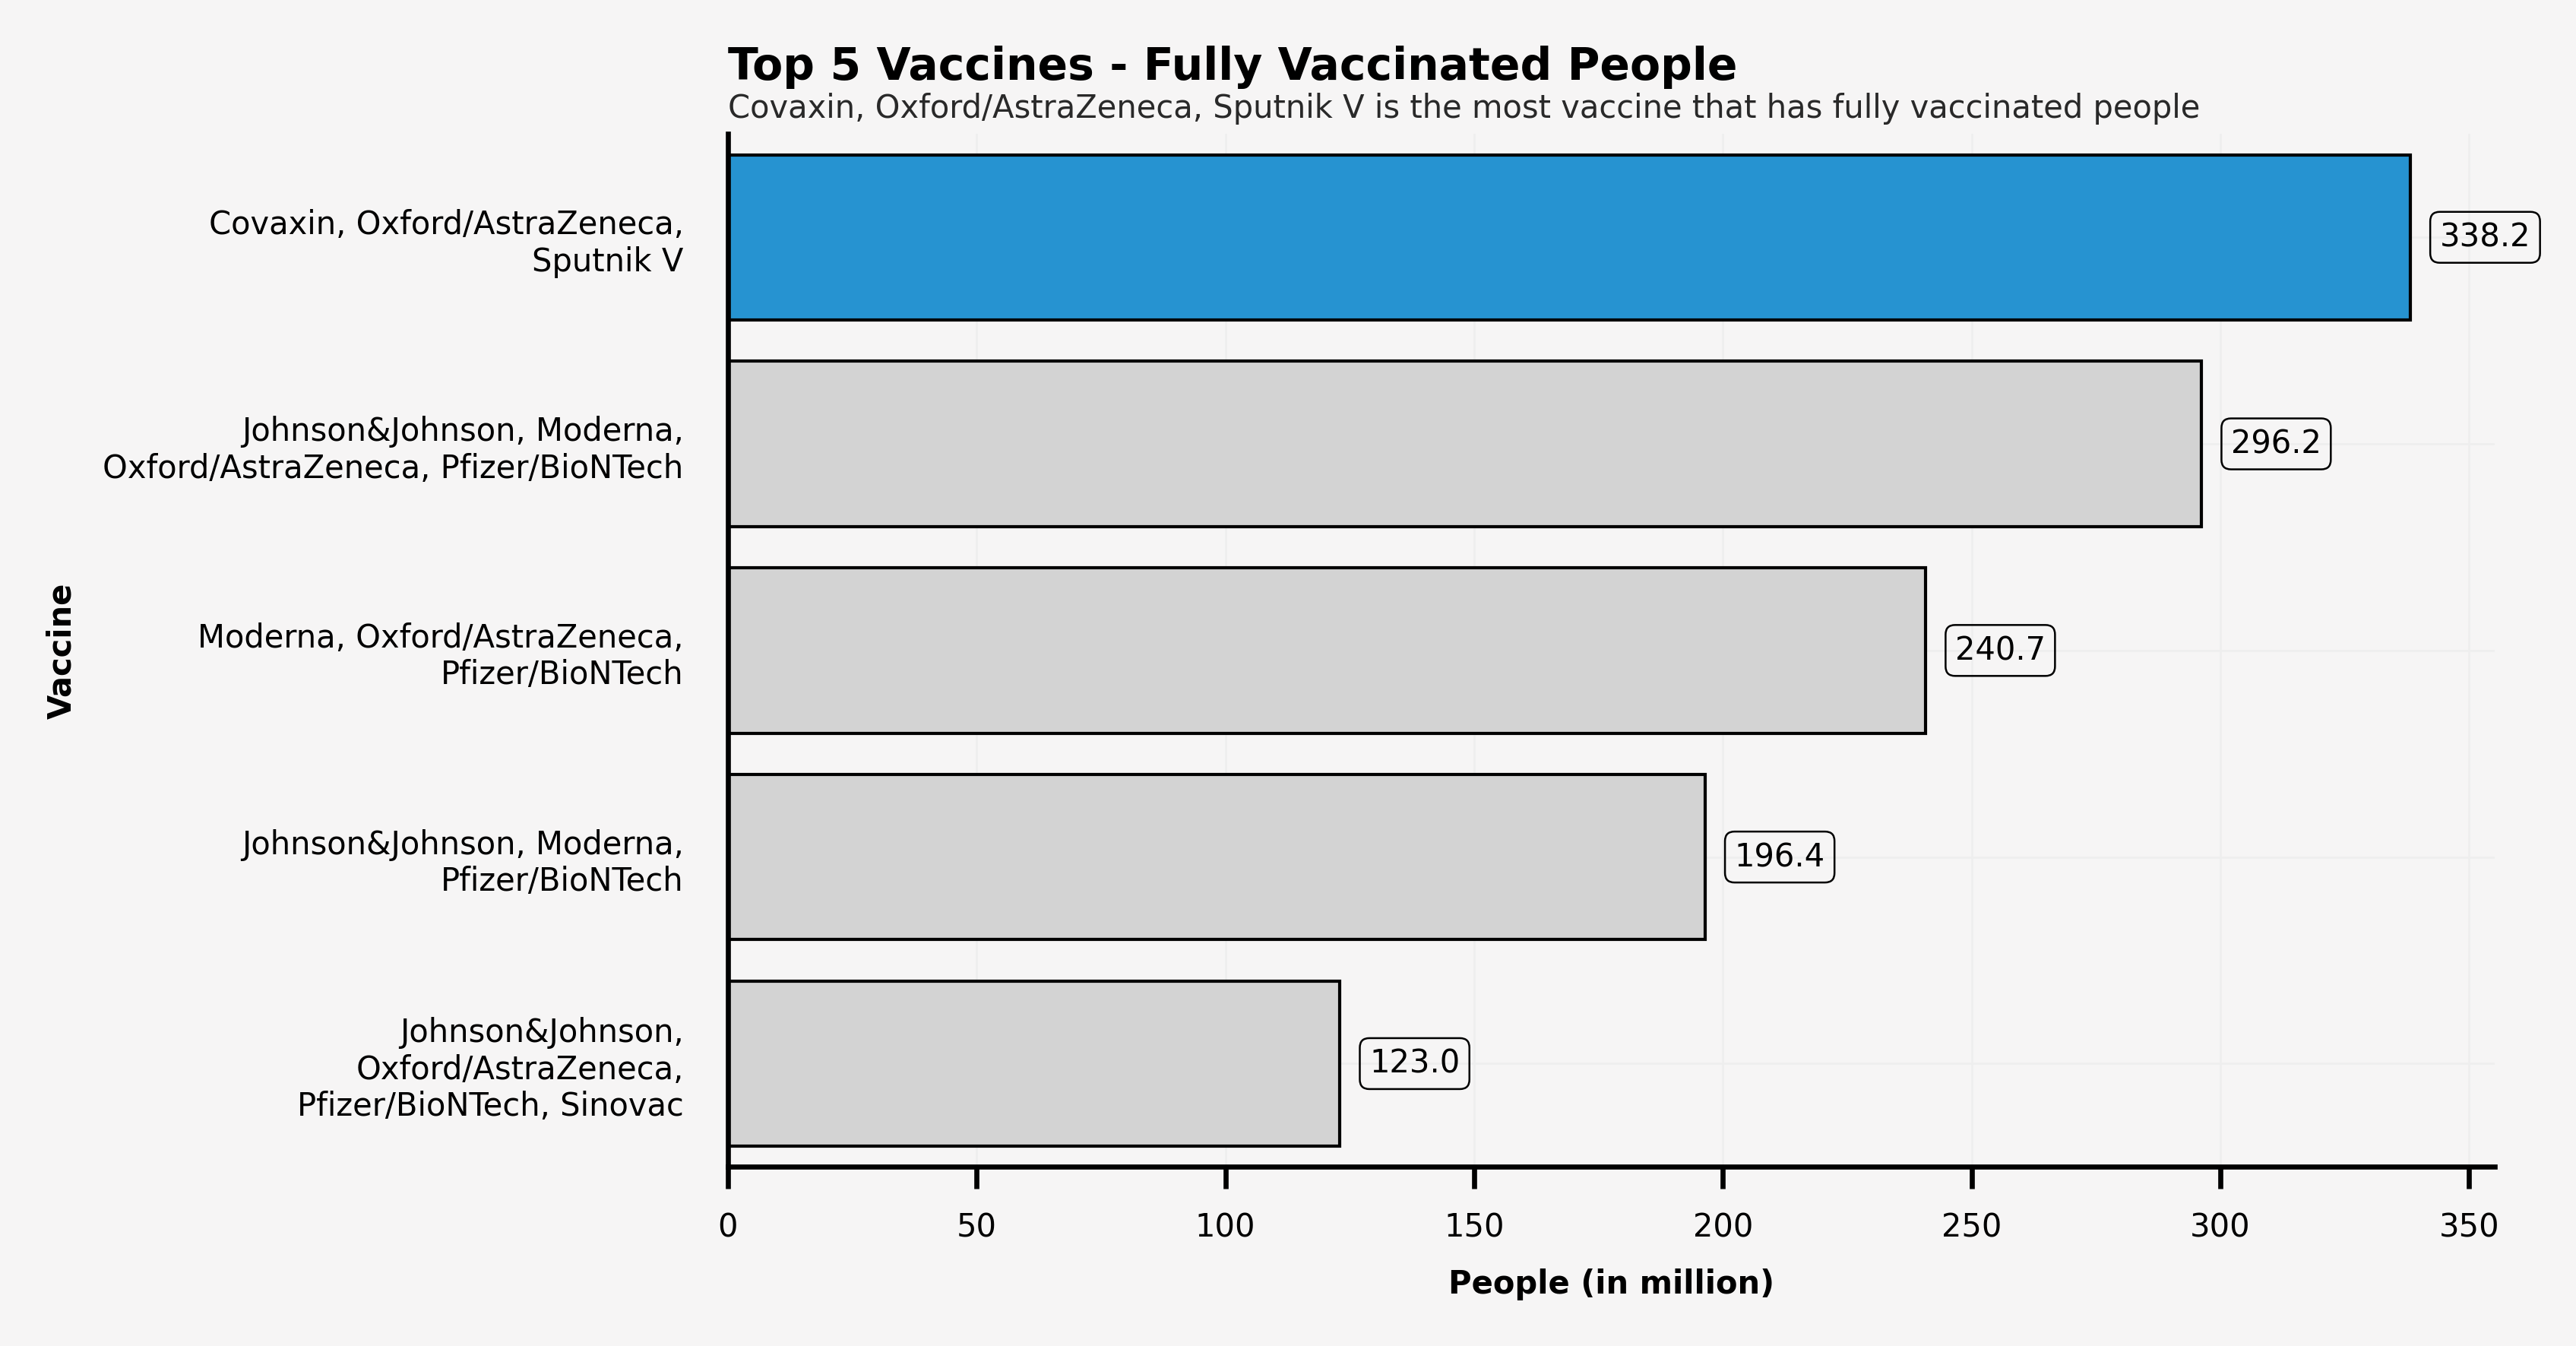

In [49]:
comb_vaccine = data_lastest.groupby('vaccines')['people_fully_vaccinated'].sum().sort_values(ascending=False)
comb_vaccine = comb_vaccine/1000000
comb_vaccine = comb_vaccine[:5]
top_vaccine = comb_vaccine.head(1).index[0]
background_color = "#f6f5f5"
color_map = ["lightgray" for _ in range(26)]
color_map[0] = "#2693d1"
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 3), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = "y", which = "both", left = False)

ax0.text(0, -0.72, 'Top 5 Vaccines - Fully Vaccinated People', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(0, -0.7, f'{top_vaccine} is the most vaccine that has fully vaccinated people', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, y=comb_vaccine.index, x=comb_vaccine, zorder=2, orient='h', 
                      linewidth=0.5, edgecolor='black', saturation=1)
ax0_sns.set_xlabel("People (in million)",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccine",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)
ax0.set_yticklabels([textwrap.fill(e, 35) for e in comb_vaccine.index])

for p in ax0.patches:
    value = f'{p.get_width():,.1f}'
    x = p.get_x() + p.get_width() + 15
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=5, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()

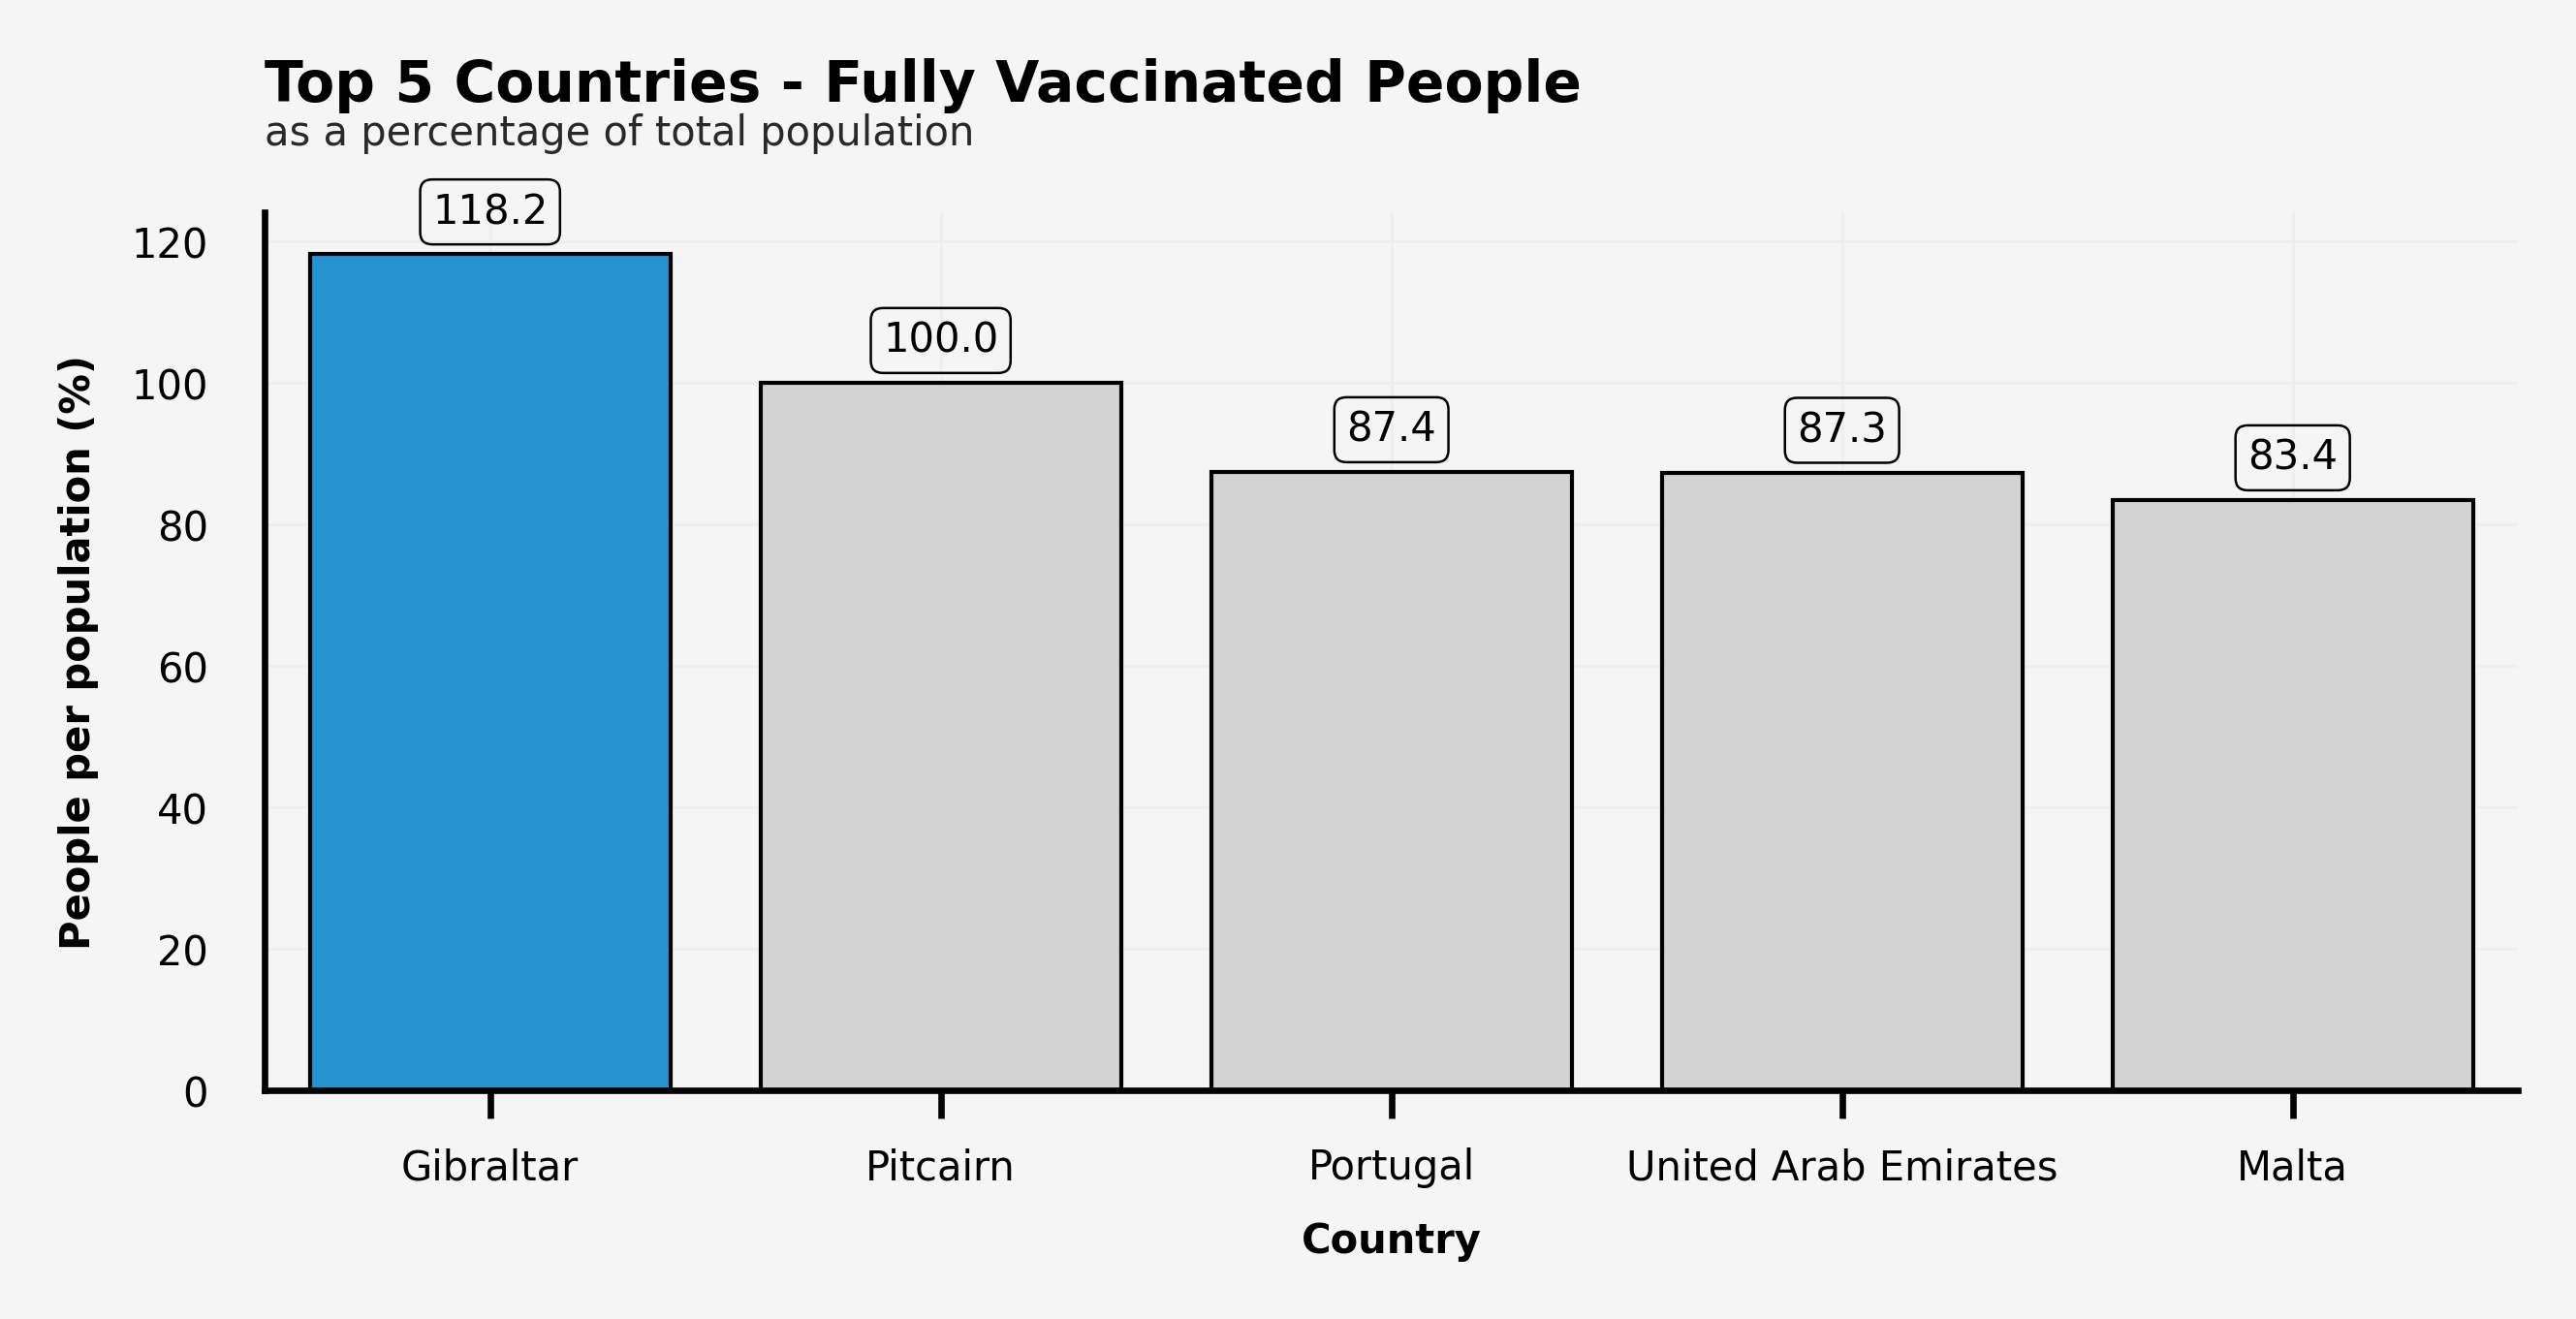

In [64]:
fully_vaccinated_pct = data_lastest.sort_values('people_fully_vaccinated_per_hundred', ascending=False).reset_index(drop=True).loc[:4, :]
top_pct = fully_vaccinated_pct.head(1)['people_fully_vaccinated_per_hundred'].values[0]
background_color = "#f6f5f5"
color_map = ["lightgray" for _ in range(5)]
color_map[0] = "#2693d1"
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = "y", which = "both", left = False)

ax0.text(-0.5, top_pct+20, 'Top 5 Countries - Fully Vaccinated People', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-0.5, top_pct+20, 'as a percentage of total population', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, x=fully_vaccinated_pct['country'], y=fully_vaccinated_pct['people_fully_vaccinated_per_hundred'], 
                      zorder=2, linewidth=0.5, edgecolor='black', saturation=1)
ax0_sns.set_xlabel("Country",fontsize=5, weight='bold')
ax0_sns.set_ylabel("People per population (%)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

for p in ax0.patches:
    value = f'{p.get_height():,.1f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 6
    ax0.text(x, y, value, ha='center', va='center', fontsize=5, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()

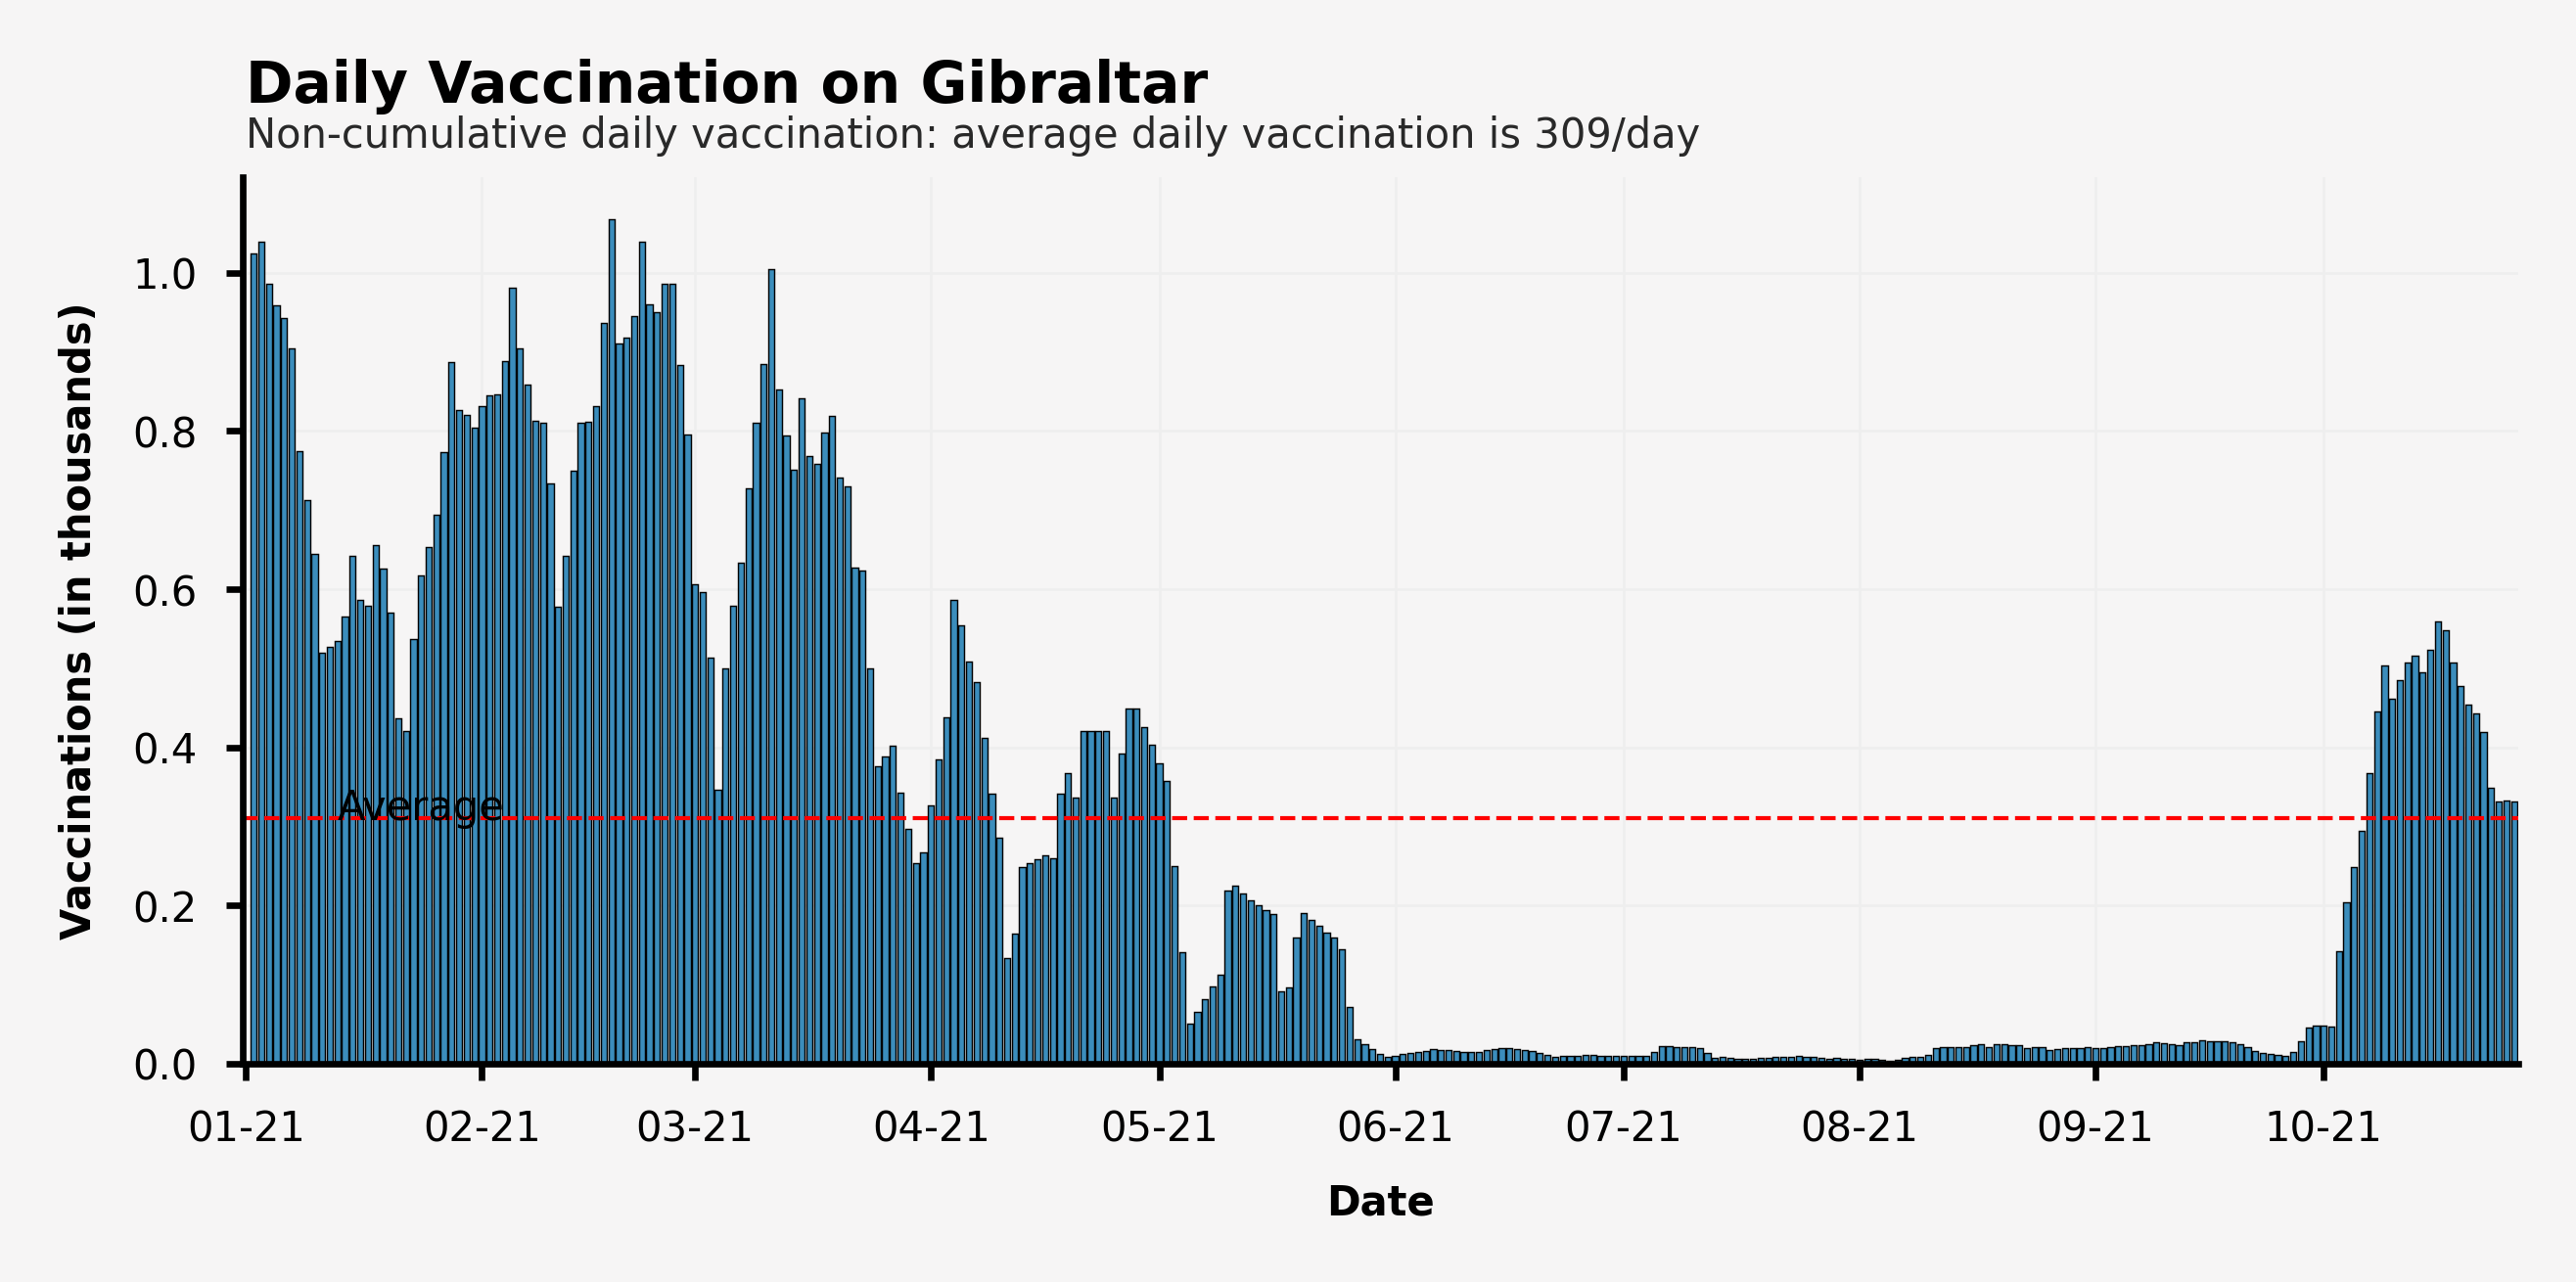

In [113]:
top_country = fully_vaccinated_pct.head(2)['country'].values[0]
top = df_vaccine[df_vaccine['country']==top_country]
average_vaccine = round(top['daily_vaccinations'].sum()/len(top['daily_vaccinations']))
background_color = "#f6f5f5"

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%b %Y')

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
# format the ticks
ax0.xaxis.set_major_locator(months)
ax0.xaxis.set_major_formatter(years_fmt)

ax0.text(pd.Timestamp('1970-1-1'), 1.201, 'Daily Vaccination on Gibraltar', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(pd.Timestamp('1970-1-1'), 1.200, f'Non-cumulative daily vaccination: average daily vaccination is {average_vaccine}/day', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, x=top['date'], y=top['daily_vaccinations']/1000, zorder=2, color='#2693d1', linewidth=0.17, edgecolor='black')
plt.axhline(np.mean(top['daily_vaccinations']/1000), color='red', linewidth=0.5, linestyle="--")
ax0_sns.set_xlabel("Date",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccinations (in thousands)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', lw=0.3)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', lw=0.3)
ax0_sns.tick_params(labelsize=5)

ax0.tick_params('both', length=2, which='major', labelsize=5)
ax0.xaxis.set_major_locator(months)
list_months = pd.date_range(top['date'].min(), top['date'].max(), 
              freq='M').strftime('%m-%y').tolist()

ax0.set_xticklabels(list_months)

ax0.annotate("Average", 
             xy=(np.datetime64("1970-01-13"), average_vaccine/1000), 
             xytext=(np.datetime64("1970-01-13"), average_vaccine/1000), 
             fontsize=5)

plt.show()